In [218]:
!pip install yfinance

In [219]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [220]:
import yfinance as yf
import pandas as pd

symbols = ['CPF.bk','CBG.bk','TU.bk','OSP.bk' ]


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()


start_date = '2020-01-01'
end_date = '2024-12-31'

for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

กำลังดึงข้อมูลของ CPF.bk ...
กำลังดึงข้อมูลของ CBG.bk ...
กำลังดึงข้อมูลของ TU.bk ...



[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ OSP.bk ...
         Date     CPF.bk     CBG.bk      TU.bk     OSP.bk
0  01/02/2020  23.983332  75.453339  10.547319  33.046814
1  01/03/2020  24.415464  75.226097  10.779978  33.658783
2  01/06/2020  23.983332  73.635193  10.237103  33.454796
3  01/07/2020  24.199398  75.680634  10.469765  34.066772
4  01/08/2020  24.199398  73.862465  10.314657  34.474758


<Axes: title={'center': 'Agri Group-SET50 Close Prices (2020-2024)'}, xlabel='Date'>

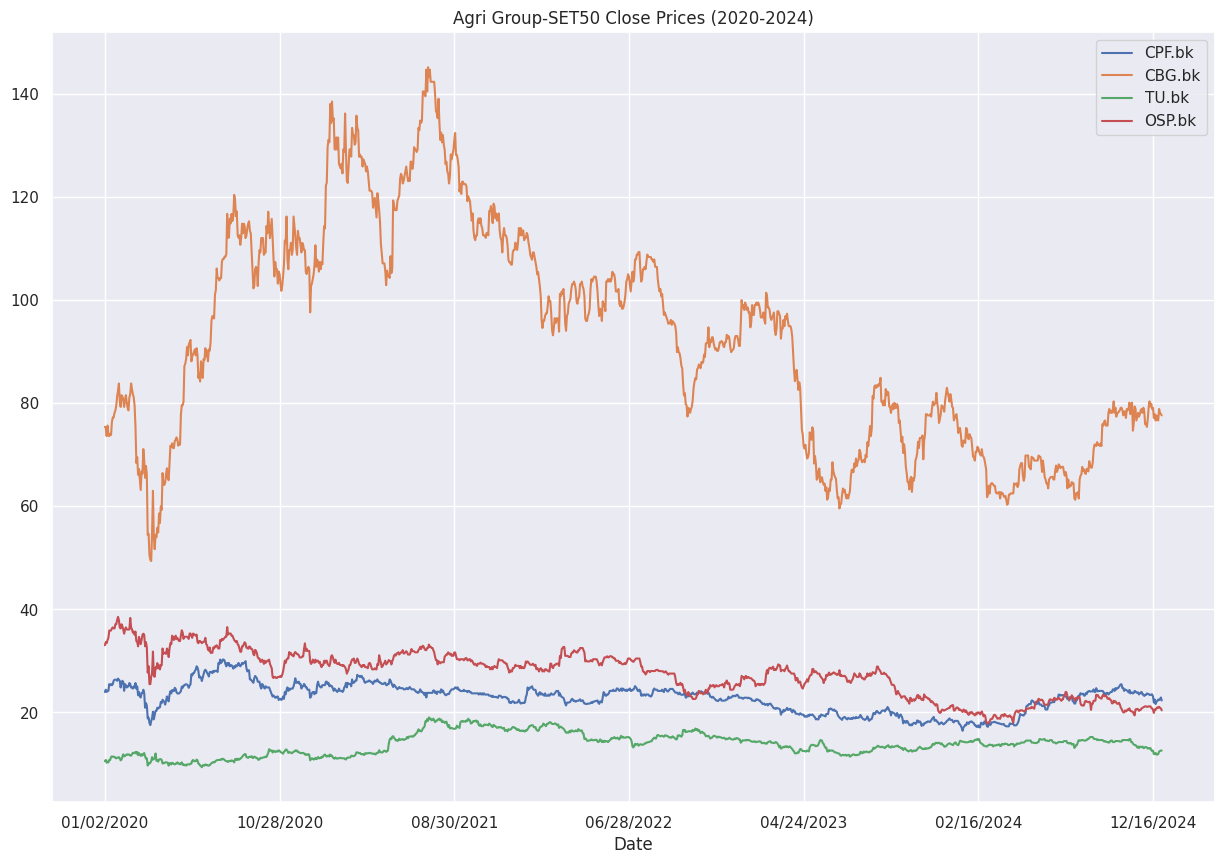

In [221]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title='Agri Group-SET50 Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Agri Group-SET50 (Base 100)'}, xlabel='Date'>

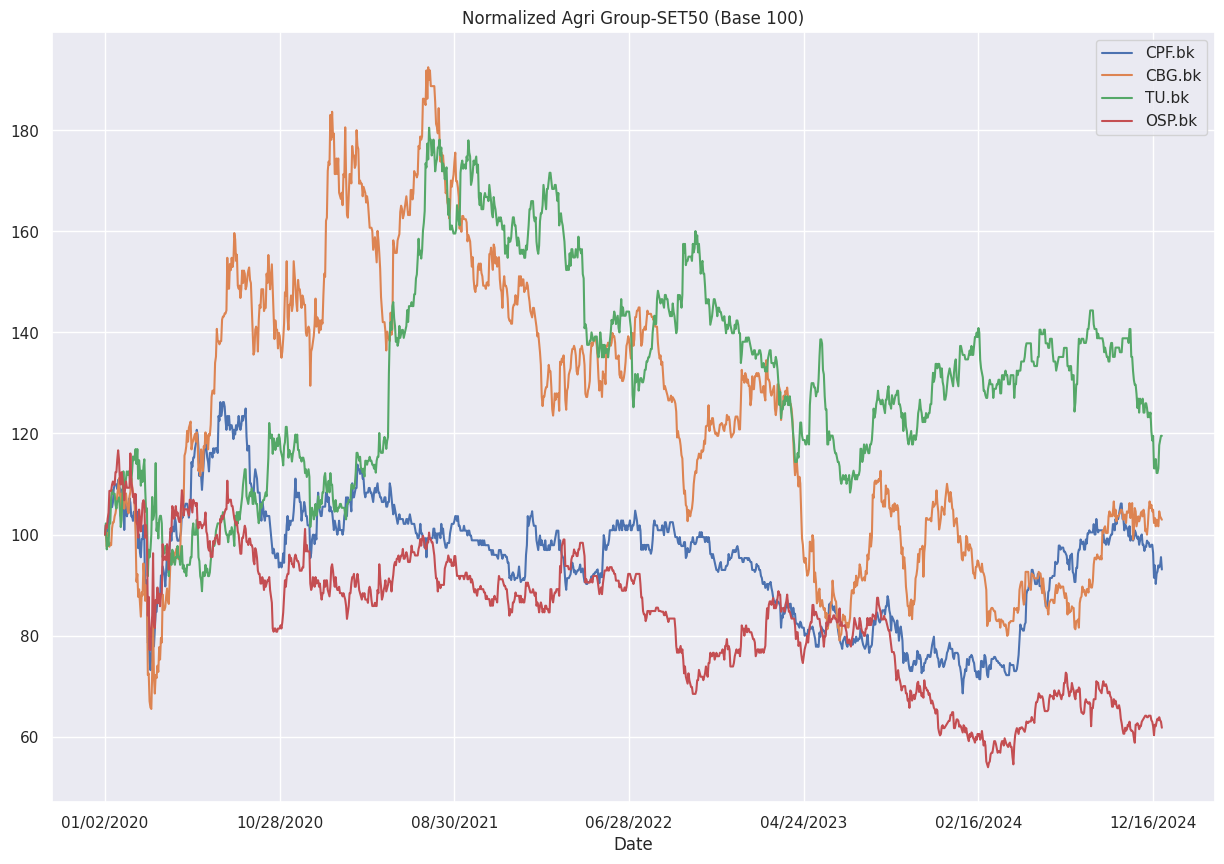

In [222]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Agri Group-SET50 (Base 100)')


In [223]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())


              CPF.bk    CBG.bk     TU.bk    OSP.bk
Date                                              
01/03/2020  0.017858 -0.003016  0.021819  0.018349
01/06/2020 -0.017858 -0.021375 -0.051672 -0.006079
01/07/2020  0.008969  0.027399  0.022473  0.018127
01/08/2020  0.000000 -0.024318 -0.014926  0.011905
01/09/2020  0.052186 -0.003082  0.044125  0.040585


หุ้น CPF.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000059
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.017002
  - หมายความว่า โดยเฉลี่ยหุ้น CPF.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0059% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.7002% ต่อวัน
--------------------------------------------------
หุ้น CBG.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000024
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.022968
  - หมายความว่า โดยเฉลี่ยหุ้น CBG.bk มีการเปลี่ยนแปลงราคาประมาณ 0.0024% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.2968% ต่อวัน
--------------------------------------------------
หุ้น TU.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000147
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.017505
  - หมายความว่า โดยเฉลี่ยหุ้น TU.bk มีการเปลี่ยนแปลงราคาประมาณ 0.0147% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.7505% ต่อวัน
--------------------------------------------------
หุ้น OSP.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000398
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.018929
  - หมายความว่า โดยเฉลี่ยหุ้น OSP.bk มีการเปลี่

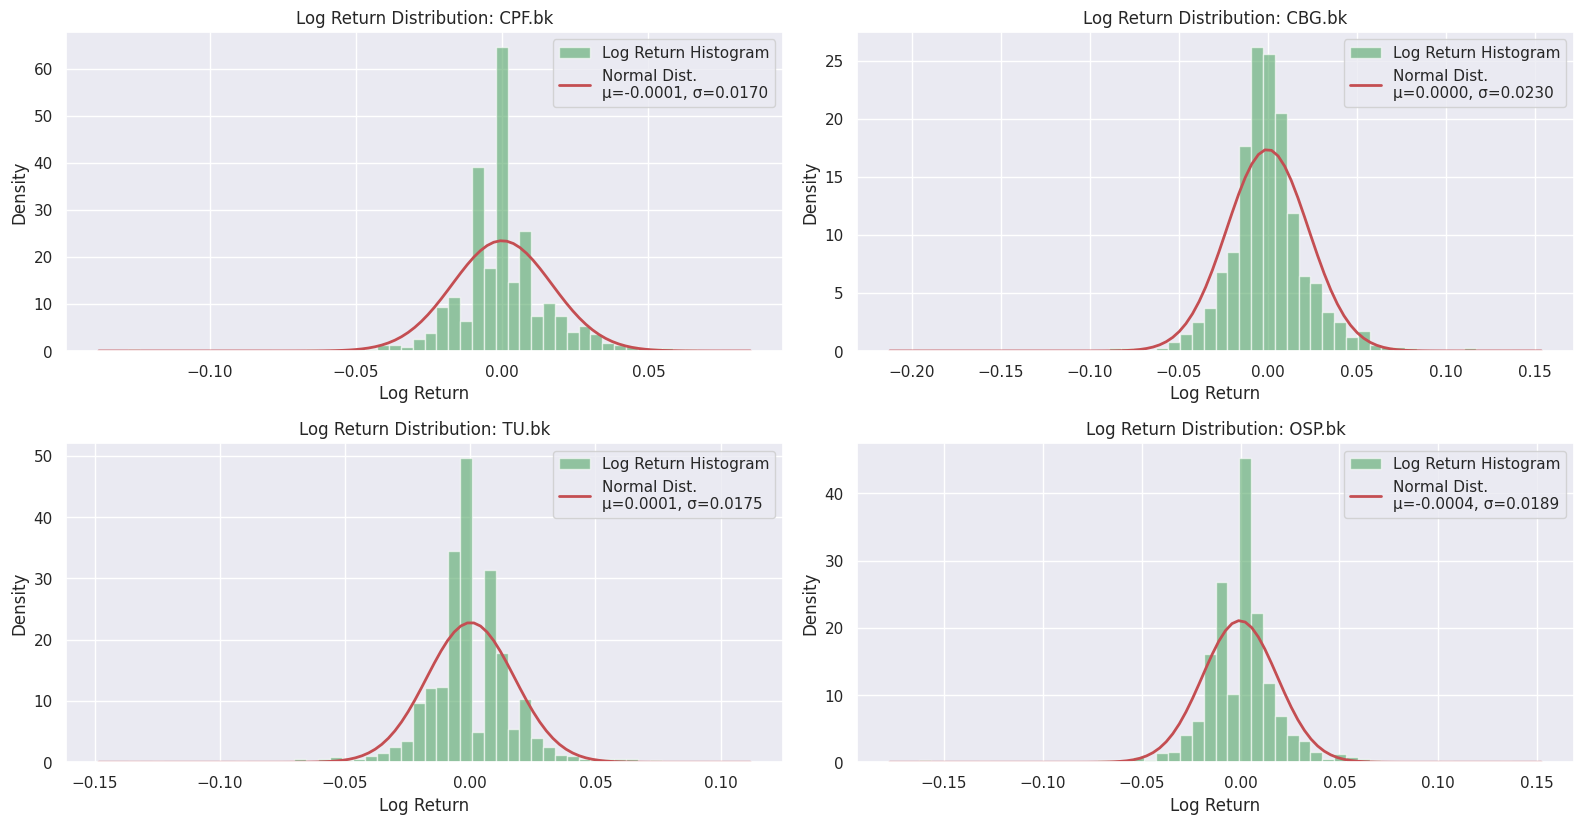

In [224]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# สมมติ rets คือ log return ที่คำนวณไว้แล้ว (DataFrame)



plt.figure(figsize=(16, 12))

for i, sym in enumerate(symbols, 1):
    plt.subplot(3, 2, i)

    data = rets[sym]

    # plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # คำนวณ mean กับ std
    mu, std = data.mean(), data.std()

    # สร้างช่วง x
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    # คำนวณ PDF normal distribution
    p = stats.norm.pdf(x, mu, std)

    # plot normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'Log Return Distribution: {sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # แสดงผลทาง console
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()


คำนวณ percentile 5% และกำหนด vertical line (axvline)

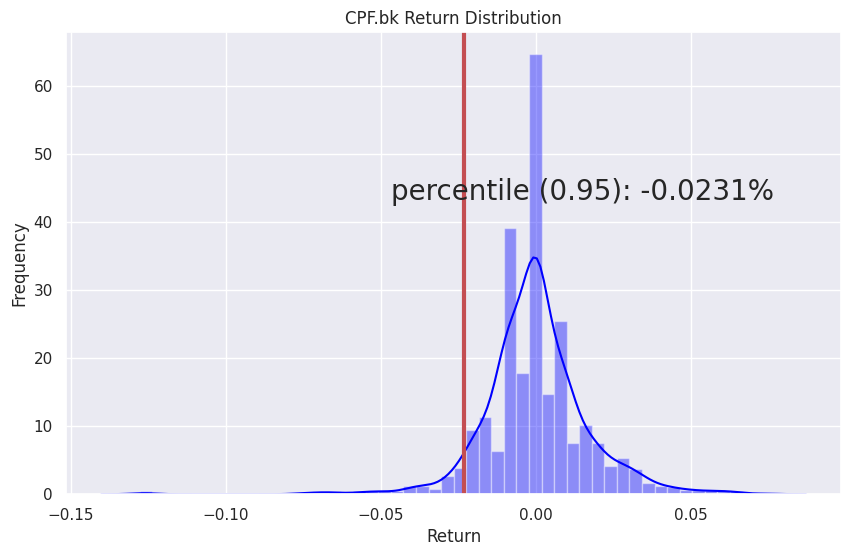


From January 1, 2020 to December 31, 2024 (5 years total),
there is only a 5% chance that CPF's daily return
would fall below -2.31% on any given day.



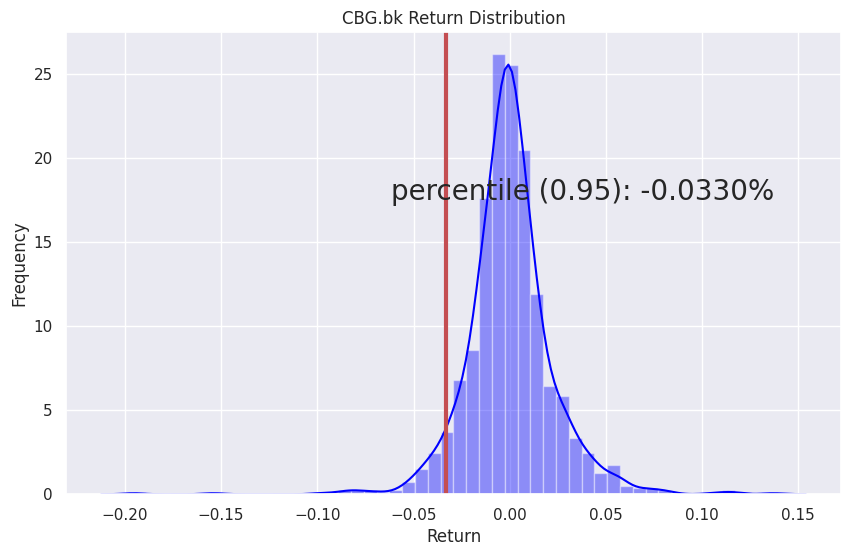


From January 1, 2020 to December 31, 2024 (5 years total),
there is only a 5% chance that CBG's daily return
would fall below -3.30% on any given day.



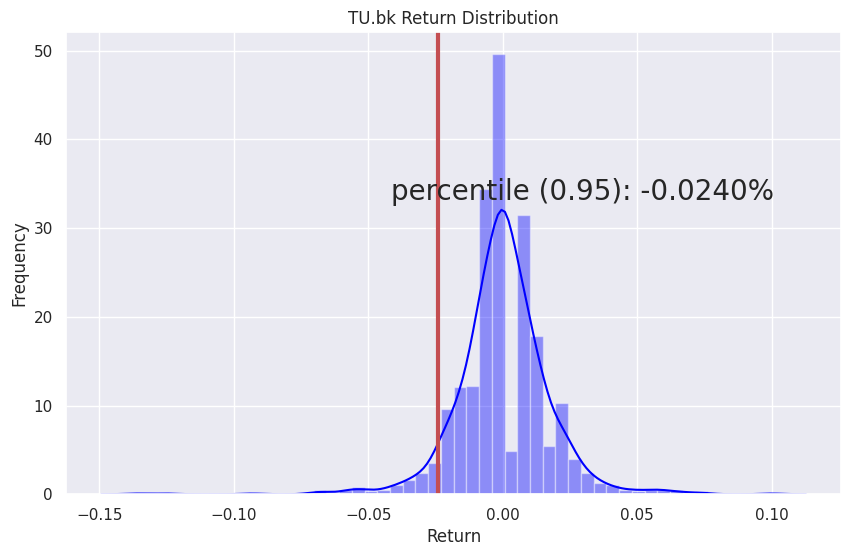


From January 1, 2020 to December 31, 2024 (5 years total),
there is only a 5% chance that TU's daily return
would fall below -2.40% on any given day.



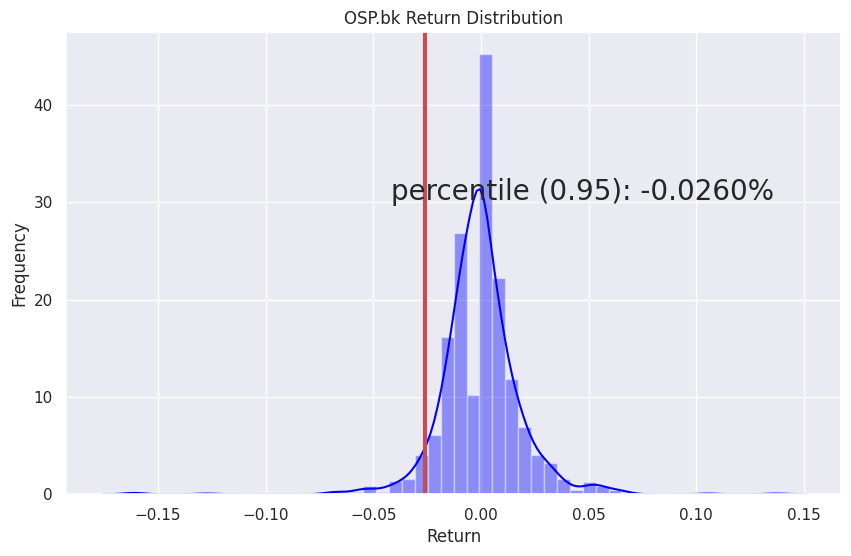


From January 1, 2020 to December 31, 2024 (5 years total),
there is only a 5% chance that OSP's daily return
would fall below -2.60% on any given day.



In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# วนลูปสำหรับ plot แต่ละหุ้น
for sym in symbols:
    plt.figure(figsize=(10, 6))  # กำหนดขนาดภาพแต่ละรูป
    sns.distplot(rets[sym], bins=50, color='blue')
    p = np.percentile(rets[sym], 5)  # คำนวณเปอร์เซ็นไทล์ 5% (หมายถึง downside 95%)
    plt.title(f"{sym} Return Distribution")
    plt.axvline(x=p, linewidth=3, color='r')
    plt.figtext(
        0.45, 0.6,
        f"percentile (0.95): {p:.4f}%",
        fontsize=20
    )
    plt.grid(True)
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.show()

    # 🔁 พิมพ์ข้อความคำอธิบายใน Console แทนการใส่ในกราฟ
    print(f"\nFrom January 1, 2020 to December 31, 2024 (5 years total),")
    print(f"there is only a 5% chance that {sym.split('.')[0]}'s daily return")
    print(f"would fall below {p:.2%} on any given day.\n")




CPF.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.31% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.88% ต่อวัน (Upside Potential)

CBG.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.30% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.65% ต่อวัน (Upside Potential)

TU.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.40% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.57% ต่อวัน (Upside Potential)

OSP.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.60% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.90% ต่อวัน (Upside Potential)



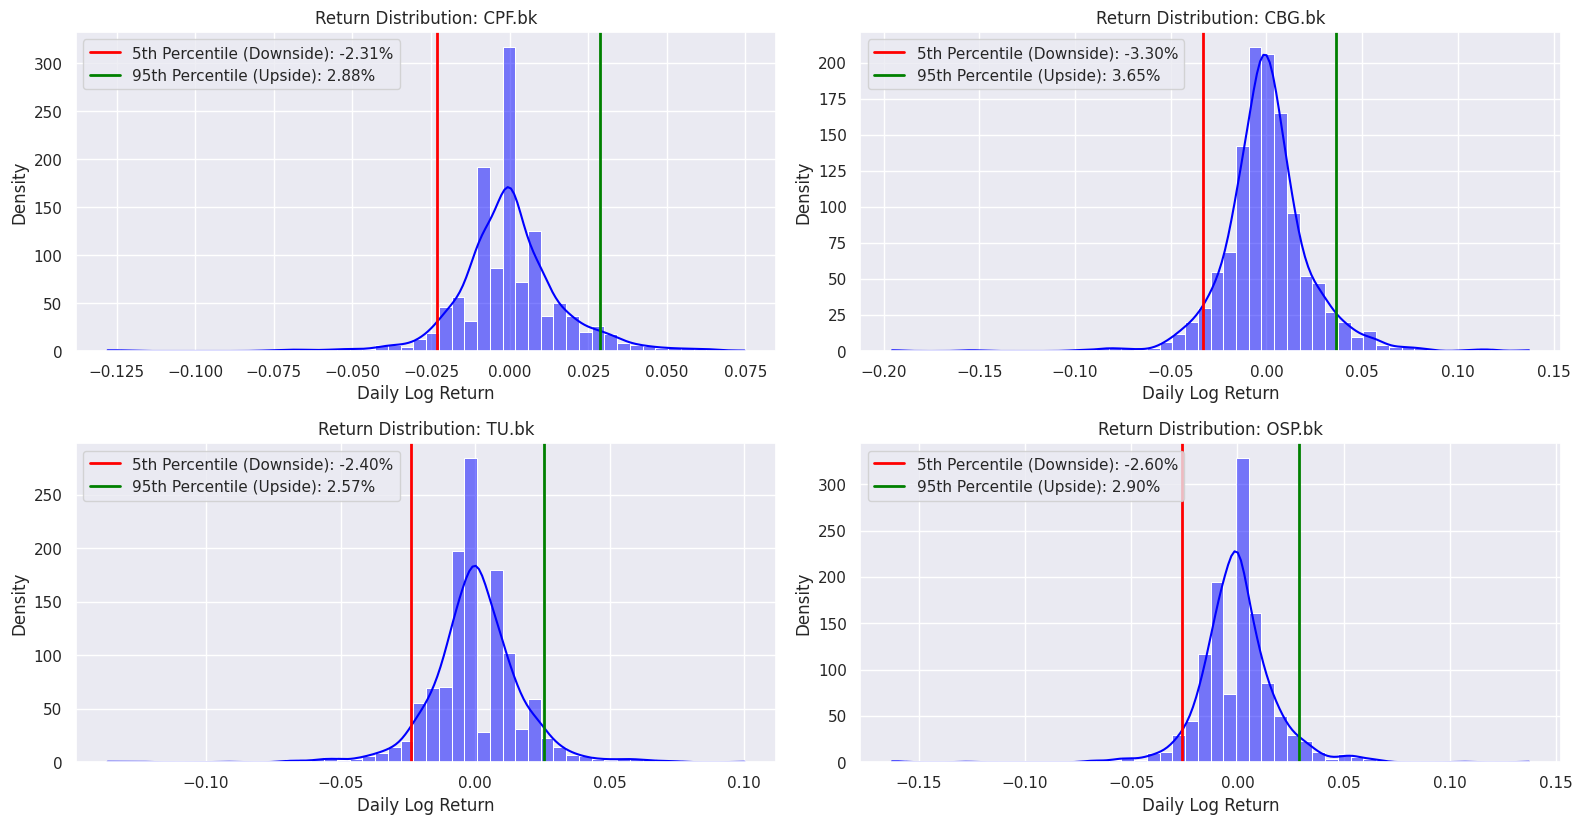

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# สมมติว่ามี DataFrame 'rets' ที่เก็บ log return ของหุ้นแต่ละตัว

plt.figure(figsize=(16, 12))

for i, sym in enumerate(symbols, 1):
    plt.subplot(3, 2, i)

    data = rets[sym]

    # plot histogram และ KDE ของ log return
    sns.histplot(data, bins=50, color='blue', kde=True)

    # คำนวณ downside risk (5th percentile)
    p5 = np.percentile(data, 5) * 100  # แปลงเป็นเปอร์เซ็นต์
    # คำนวณ upside potential (95th percentile)
    p95 = np.percentile(data, 95) * 100

    # วาดเส้นแสดงตำแหน่ง downside และ upside
    plt.axvline(x=p5/100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95/100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    # ตั้งชื่อกราฟและแกน
    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # คำอธิบายผลลัพธ์ (print ลง console)
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()

In [227]:
# สมมติ rets เป็น DataFrame ผลตอบแทนรายวันของหุ้นแต่ละตัว

# หาความเสี่ยง (Standard Deviation) รายวันของหุ้นแต่ละตัว
risk = rets.std()
print("ความเสี่ยง (SD) ของหุ้นแต่ละตัว")
print(risk)

# หาผลตอบแทนเฉลี่ย (Mean Return) รายวันของหุ้นแต่ละตัว
mean_return = rets.mean()
print("\nผลตอบแทนเฉลี่ย (Mean) รายวันของหุ้นแต่ละตัว")
print(mean_return)


ความเสี่ยง (SD) ของหุ้นแต่ละตัว
CPF.bk    0.017002
CBG.bk    0.022968
TU.bk     0.017505
OSP.bk    0.018929
dtype: float64

ผลตอบแทนเฉลี่ย (Mean) รายวันของหุ้นแต่ละตัว
CPF.bk   -0.000059
CBG.bk    0.000024
TU.bk     0.000147
OSP.bk   -0.000398
dtype: float64


In [229]:
print(rets.head())
print(rets.columns)


              CPF.bk    CBG.bk     TU.bk    OSP.bk
Date                                              
01/03/2020  0.017858 -0.003016  0.021819  0.018349
01/06/2020 -0.017858 -0.021375 -0.051672 -0.006079
01/07/2020  0.008969  0.027399  0.022473  0.018127
01/08/2020  0.000000 -0.024318 -0.014926  0.011905
01/09/2020  0.052186 -0.003082  0.044125  0.040585
Index(['CPF.bk', 'CBG.bk', 'TU.bk', 'OSP.bk'], dtype='object')


ความเสี่ยง (SD) ของหุ้นแต่ละตัว
CPF.bk    0.017002
CBG.bk    0.022968
TU.bk     0.017505
OSP.bk    0.018929
dtype: float64

ผลตอบแทนเฉลี่ย (Mean) รายวันของหุ้นแต่ละตัว
CPF.bk   -0.000059
CBG.bk    0.000024
TU.bk     0.000147
OSP.bk   -0.000398
dtype: float64


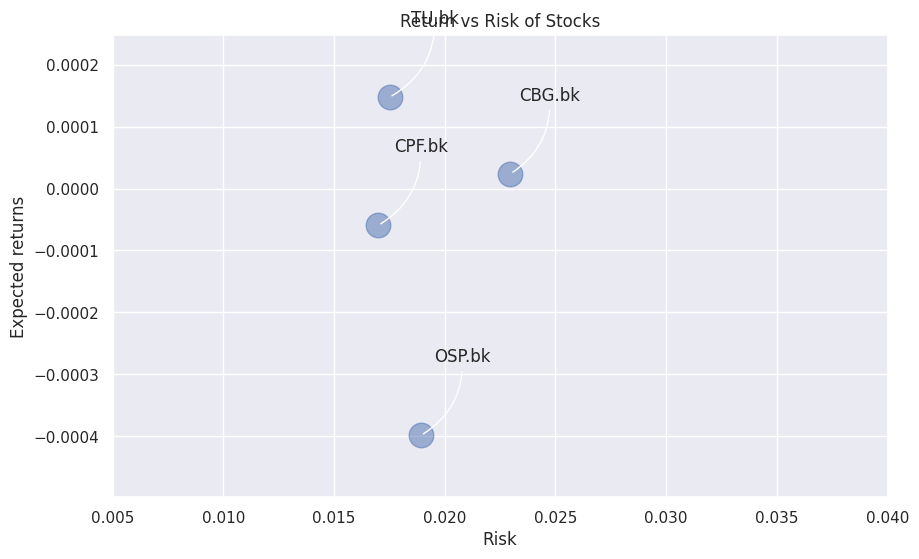

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# คำนวณ risk และ mean return จาก rets ที่มีอยู่แล้ว
risk = rets.std()
mean_return = rets.mean()

print("ความเสี่ยง (SD) ของหุ้นแต่ละตัว")
print(risk)

print("\nผลตอบแทนเฉลี่ย (Mean) รายวันของหุ้นแต่ละตัว")
print(mean_return)

# กำหนดขนาดจุด scatter plot
area = np.pi * 100

plt.figure(figsize=(10, 6))
plt.scatter(risk, mean_return, alpha=0.5, s=area)
plt.ylabel('Expected returns')
plt.xlabel('Risk')

# วนลูปใส่ชื่อหุ้นในกราฟ
for label, x, y in zip(rets.columns, risk, mean_return):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points',
        ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3')
    )

# กำหนดขอบเขตแกนให้เหมาะสม
plt.xlim(0.005, 0.04)
plt.ylim(min(mean_return) - 0.0001, max(mean_return) + 0.0001)

plt.title('Return vs Risk of Stocks')
plt.grid(True)
plt.show()


In [232]:
print(rets.head())
print(rets.columns)
print(rets.mean())
print(rets.std())


              CPF.bk    CBG.bk     TU.bk    OSP.bk
Date                                              
01/03/2020  0.017858 -0.003016  0.021819  0.018349
01/06/2020 -0.017858 -0.021375 -0.051672 -0.006079
01/07/2020  0.008969  0.027399  0.022473  0.018127
01/08/2020  0.000000 -0.024318 -0.014926  0.011905
01/09/2020  0.052186 -0.003082  0.044125  0.040585
Index(['CPF.bk', 'CBG.bk', 'TU.bk', 'OSP.bk'], dtype='object')
CPF.bk   -0.000059
CBG.bk    0.000024
TU.bk     0.000147
OSP.bk   -0.000398
dtype: float64
CPF.bk    0.017002
CBG.bk    0.022968
TU.bk     0.017505
OSP.bk    0.018929
dtype: float64


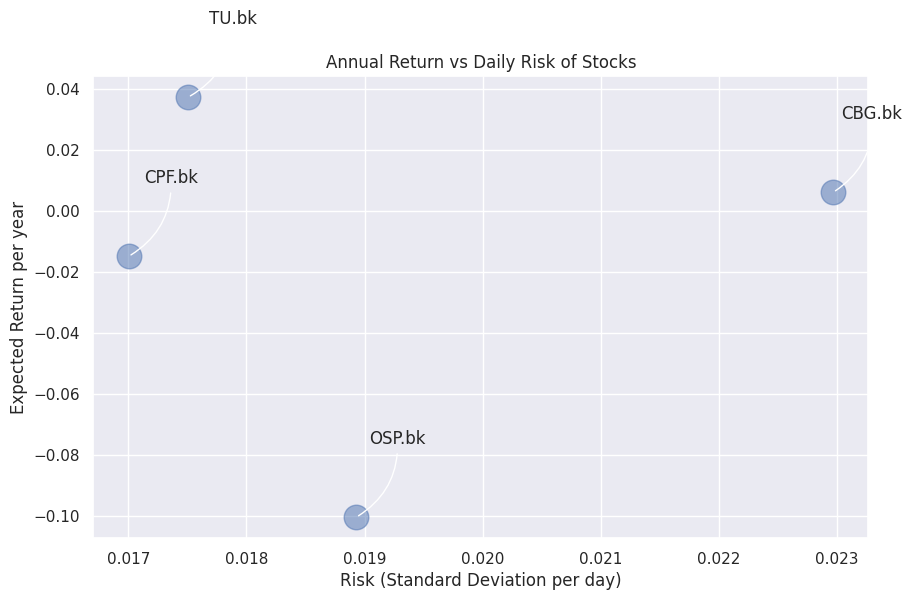

In [235]:
import matplotlib.pyplot as plt
import numpy as np

# คำนวณ Return รายปี (252 วันทำการ)
yearly_return = rets.mean() * 252

# ค่าความเสี่ยง (Standard Deviation รายวัน)
risk = rets.std()

# ขนาดจุด
area = np.pi * 100

plt.figure(figsize=(10, 6))
plt.scatter(risk, yearly_return, alpha=0.5, s=area)
plt.xlabel('Risk (Standard Deviation per day)')
plt.ylabel('Expected Return per year')
plt.title('Annual Return vs Daily Risk of Stocks')

# ใส่ label หุ้นแต่ละตัว
for label, x, y in zip(rets.columns, risk, yearly_return):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points',
        ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3')
    )

plt.grid(True)
plt.show()


In [234]:
import pandas as pd

# คำนวณ Mean Return, Std Dev, Annualized Return
mean_return = rets.mean()
std_dev = rets.std()
annual_return = mean_return * 252  # สมมติ 252 วันทำการต่อปี

# สร้าง DataFrame สรุป
summary_df = pd.DataFrame({
    'Mean Return (รายวัน)': mean_return,
    'Std Dev (รายวัน)': std_dev,
    'Annual Return': annual_return
})

# ฟอร์แมตตัวเลขเป็นเปอร์เซ็นต์ 4 ตำแหน่งทศนิยม
summary_df_formatted = summary_df.style.format({
    'Mean Return (รายวัน)': "{:.6f}",
    'Std Dev (รายวัน)': "{:.6f}",
    'Annual Return': "{:.6f}"
})

print("สรุปความเสี่ยงและผลตอบแทนของหุ้นแต่ละตัว (รายวันและรายปี)")
print(summary_df)

# ถ้ารันใน Jupyter notebook ให้แสดงแบบสวยงาม
# display(summary_df_formatted)
summary_df_percent = summary_df * 100
summary_df_percent.columns = ['Mean Return (รายวัน) %', 'Std Dev (รายวัน) %', 'Annual Return %']

print(summary_df_percent.round(4))



สรุปความเสี่ยงและผลตอบแทนของหุ้นแต่ละตัว (รายวันและรายปี)
        Mean Return (รายวัน)  Std Dev (รายวัน)  Annual Return
CPF.bk             -0.000059          0.017002      -0.014948
CBG.bk              0.000024          0.022968       0.006032
TU.bk               0.000147          0.017505       0.037163
OSP.bk             -0.000398          0.018929      -0.100388
        Mean Return (รายวัน) %  Std Dev (รายวัน) %  Annual Return %
CPF.bk                 -0.0059              1.7002          -1.4948
CBG.bk                  0.0024              2.2968           0.6032
TU.bk                   0.0147              1.7505           3.7163
OSP.bk                 -0.0398              1.8929         -10.0388


สรุปภาพรวม
CPF.bk

ผลตอบแทนเฉลี่ยรายวันติดลบนิดหน่อย (-0.0059%)

มีความผันผวนในระดับกลาง (1.7%)

ผลตอบแทนเฉลี่ยต่อปีติดลบประมาณ -1.49% หมายความโดยรวม 5 ปี ผลตอบแทนหุ้นนี้อาจลดลงเล็กน้อย

CBG.bk

ผลตอบแทนเฉลี่ยรายวันเป็นบวกเล็กน้อย (0.0024%)

ความผันผวนสูงสุดในกลุ่ม (2.3%)

ผลตอบแทนเฉลี่ยต่อปี 0.6% นับว่ามีโอกาสสร้างกำไรแต่ความเสี่ยงค่อนข้างสูง

TU.bk

ผลตอบแทนเฉลี่ยรายวันสูงสุดในกลุ่ม (0.0147%)

ความผันผวนไม่สูงมาก (1.75%)

ผลตอบแทนเฉลี่ยต่อปีดีที่สุดในกลุ่มที่ประมาณ 3.72% ซึ่งแสดงถึงโอกาสทำกำไรที่ดีเมื่อเทียบกับความเสี่ยง

OSP.bk

ผลตอบแทนเฉลี่ยรายวันติดลบมากที่สุด (-0.0398%)

ความผันผวนระดับกลาง (1.89%)

ผลตอบแทนเฉลี่ยต่อปีติดลบรุนแรง (-10.04%) แสดงว่าหุ้นนี้มีแนวโน้มขาดทุนในช่วงเวลาที่ศึกษานี้

ข้อคิดเพิ่มเติม
หุ้นที่มี ความผันผวนสูง (Standard Deviation สูง) หมายถึงราคาหุ้นแกว่งตัวมาก อาจทำให้ความเสี่ยงสูงตามไปด้วย

หุ้นที่มี ผลตอบแทนเฉลี่ยรายปีเป็นบวก และความผันผวนไม่สูงมาก เช่น TU.bk อาจเป็นตัวเลือกที่น่าสนใจสำหรับนักลงทุนที่รับความเสี่ยงได้ในระดับปานกลาง

หุ้นที่มีผลตอบแทนติดลบ หรือผันผวนสูง เช่น OSP.bk ควรระมัดระวังและศึกษาปัจจัยพื้นฐานเพิ่มเติมก่อนตัดสินใจลงทุน



In [170]:
import yfinance as yf
import pandas as pd

symbols = ['TRUE.bk','ADVANC.bk','DELTA.bk','CCET.bk']


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()

start_date = '2020-01-01'
end_date = '2024-12-31'


for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())

กำลังดึงข้อมูลของ TRUE.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ ADVANC.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ DELTA.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ CCET.bk ...


[*********************100%***********************]  1 of 1 completed

         Date   TRUE.bk   ADVANC.bk  DELTA.bk   CCET.bk
0  01/02/2020  4.293668  176.732910  4.861347  1.253083
1  01/03/2020  4.256332  175.111481  4.837862  1.232872
2  01/06/2020  4.088319  175.922180  4.720437  1.232872
3  01/07/2020  4.088319  180.786377  4.696953  1.232872
4  01/08/2020  3.920306  178.354294  4.626498  1.226135


<Axes: title={'center': 'Technology Group-SET50 Close Prices (2020-2024)'}, xlabel='Date'>

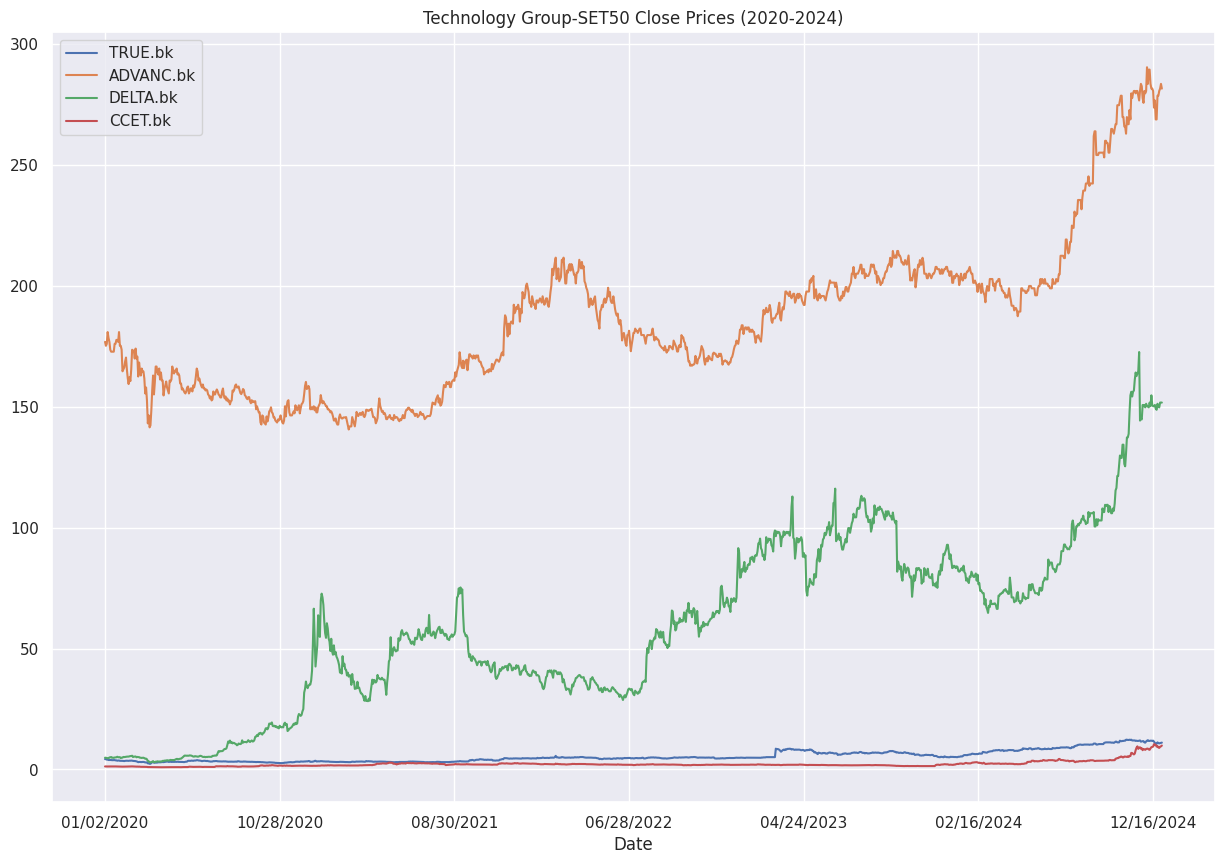

In [171]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title='Technology Group-SET50 Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Technology Group SET50 (Base 100)'}, xlabel='Date'>

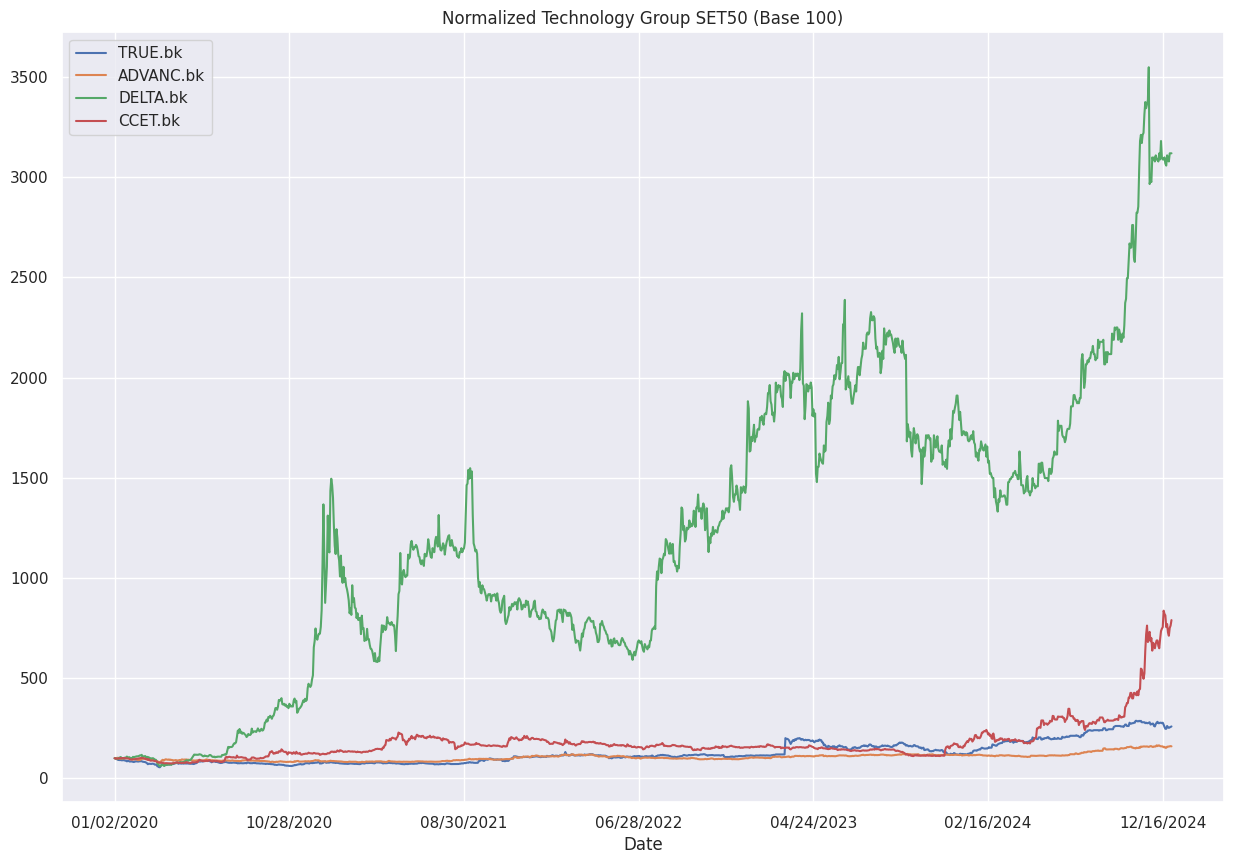

In [172]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Technology Group SET50 (Base 100)')


In [ ]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())

             TRUE.bk  ADVANC.bk  DELTA.bk   CCET.bk
Date                                               
01/04/2018  0.023347  -0.012804  0.010050  0.006734
01/05/2018 -0.015504   0.005141  0.006645 -0.020340
01/08/2018 -0.015748   0.005115  0.013158 -0.006873
01/09/2018  0.007905  -0.007682  0.009756 -0.006921
01/10/2018  0.046162  -0.002574 -0.029559  0.006921


หุ้น TRUE.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000354
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.025058
  - หมายความว่า โดยเฉลี่ยหุ้น TRUE.bk มีการเปลี่ยนแปลงราคาประมาณ 0.0354% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.5058% ต่อวัน
--------------------------------------------------
หุ้น ADVANC.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000348
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.013088
  - หมายความว่า โดยเฉลี่ยหุ้น ADVANC.bk มีการเปลี่ยนแปลงราคาประมาณ 0.0348% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.3088% ต่อวัน
--------------------------------------------------
หุ้น DELTA.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.001496
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.040172
  - หมายความว่า โดยเฉลี่ยหุ้น DELTA.bk มีการเปลี่ยนแปลงราคาประมาณ 0.1496% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 4.0172% ต่อวัน
--------------------------------------------------
หุ้น CCET.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000555
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.029374
  - หมายความว่า โดยเฉลี่ยหุ้น CCET.

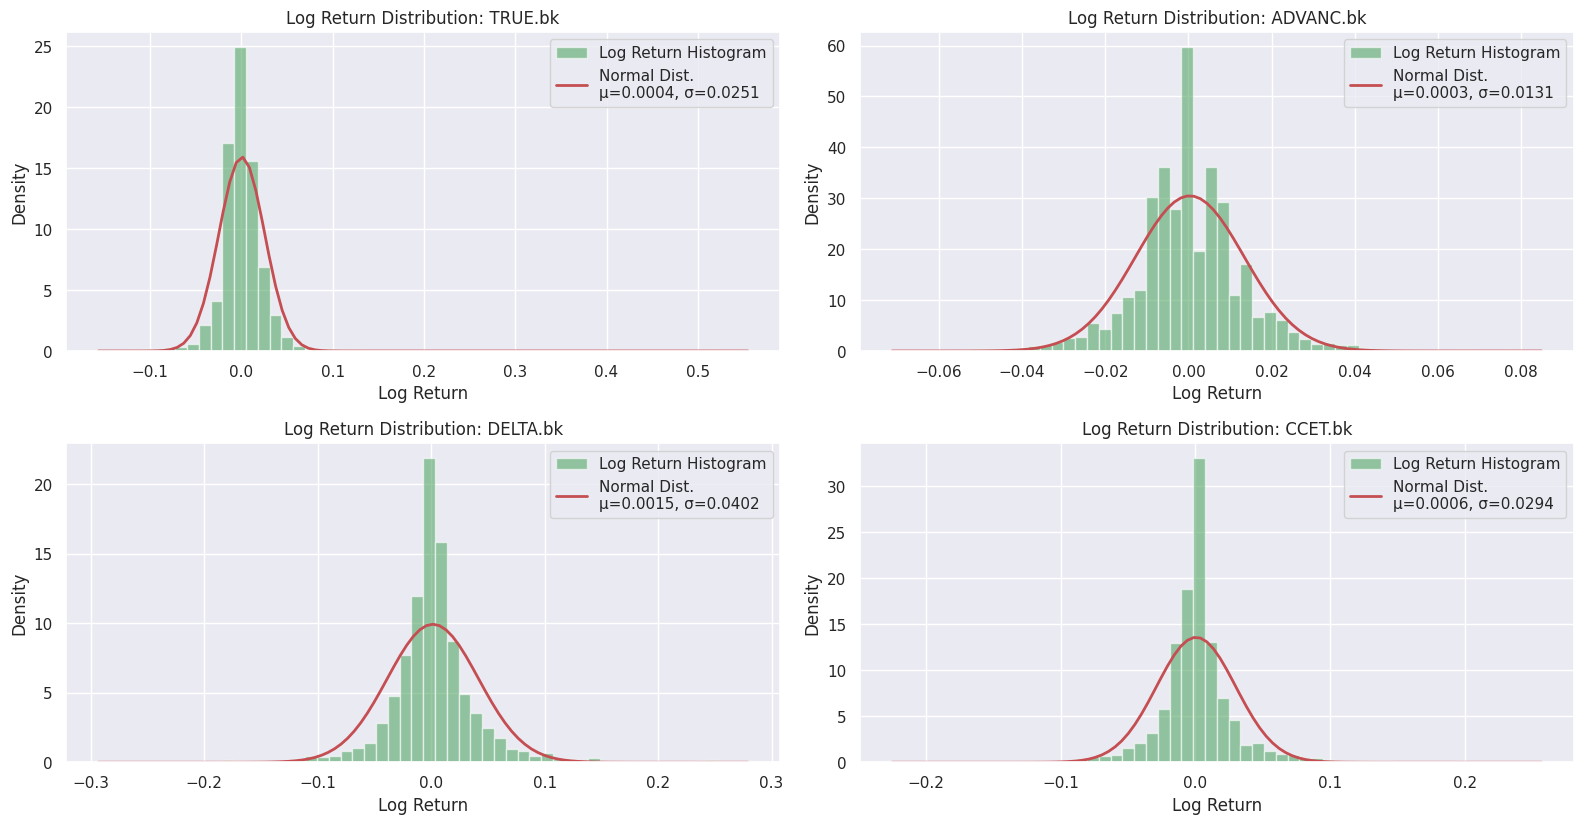

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# สมมติ rets คือ log return ที่คำนวณไว้แล้ว (DataFrame)



plt.figure(figsize=(16, 12))

for i, sym in enumerate(symbols, 1):
    plt.subplot(3, 2, i)

    data = rets[sym]

    # plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # คำนวณ mean กับ std
    mu, std = data.mean(), data.std()

    # สร้างช่วง x
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    # คำนวณ PDF normal distribution
    p = stats.norm.pdf(x, mu, std)

    # plot normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'Log Return Distribution: {sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # แสดงผลทาง console
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()

TRUE.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.23% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.58% ต่อวัน (Upside Potential)

ADVANC.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.07% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.17% ต่อวัน (Upside Potential)

DELTA.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 5.39% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 6.20% ต่อวัน (Upside Potential)

CCET.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 4.05% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 4.84% ต่อวัน (Upside Potential)



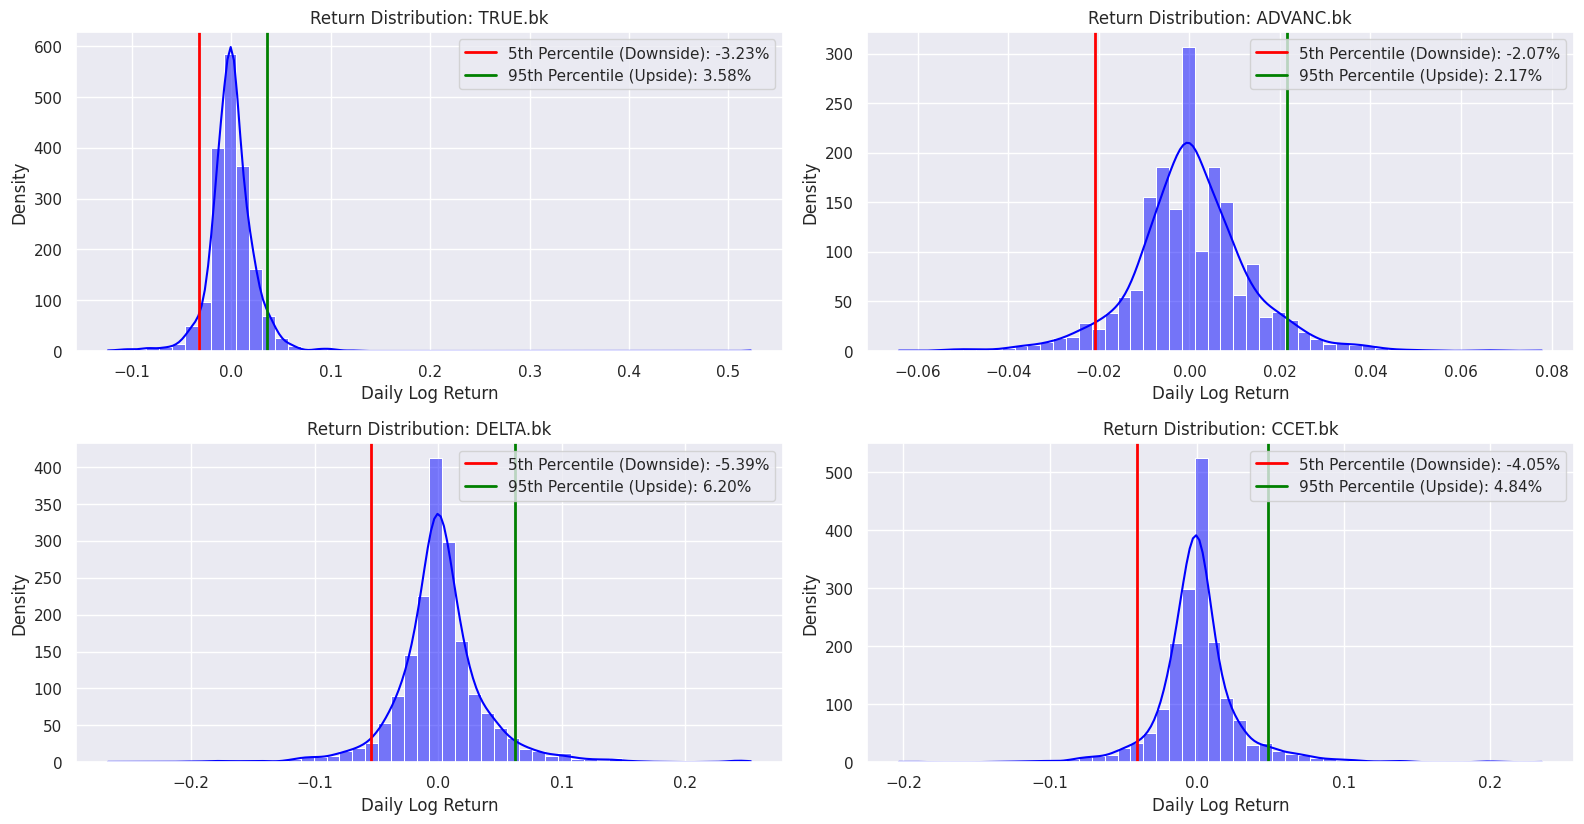

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# สมมติว่ามี DataFrame 'rets' ที่เก็บ log return ของหุ้นแต่ละตัว


plt.figure(figsize=(16, 12))

for i, sym in enumerate(symbols, 1):
    plt.subplot(3, 2, i)

    data = rets[sym]

    # plot histogram และ KDE ของ log return
    sns.histplot(data, bins=50, color='blue', kde=True)

    # คำนวณ downside risk (5th percentile)
    p5 = np.percentile(data, 5) * 100  # แปลงเป็นเปอร์เซ็นต์
    # คำนวณ upside potential (95th percentile)
    p95 = np.percentile(data, 95) * 100

    # วาดเส้นแสดงตำแหน่ง downside และ upside
    plt.axvline(x=p5/100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95/100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    # ตั้งชื่อกราฟและแกน
    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # คำอธิบายผลลัพธ์ (print ลง console)
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()

image.png

In [174]:
import yfinance as yf
import pandas as pd

symbols = ['PTTEP.bk','PTT.bk','TOP.bk','BGRIM.bk','GPSC.bk','BANPU.bk','EGCO.bk','RATCH.bk']


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()

start_date = '2020-01-01'
end_date = '2024-12-31'

for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())

กำลังดึงข้อมูลของ PTTEP.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ PTT.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ TOP.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BGRIM.bk ...
กำลังดึงข้อมูลของ GPSC.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BANPU.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ EGCO.bk ...
กำลังดึงข้อมูลของ RATCH.bk ...


[*********************100%***********************]  1 of 1 completed

         Date   PTTEP.bk     PTT.bk     TOP.bk   BGRIM.bk    GPSC.bk  \
0  01/02/2020  94.220787  34.143173  54.825993  49.416283  78.099525   
1  01/03/2020  96.068260  34.893574  55.598179  48.950085  77.420418   
2  01/06/2020  98.654709  35.268772  54.053795  48.950085  79.457794   
3  01/07/2020  98.285217  35.456375  54.053795  50.115566  81.042427   
4  01/08/2020  99.024208  35.081173  51.930248  48.716995  79.910545   

   BANPU.bk     EGCO.bk   RATCH.bk  
0  7.213546  262.255859  49.450626  
1  7.273162  259.878967  48.564415  
2  6.855851  258.294281  48.209930  
3  6.915467  259.086609  48.387180  
4  6.617386  259.086609  47.855453  


<Axes: title={'center': 'Resource Group -SET50 Close Prices (2020-2024)'}, xlabel='Date'>

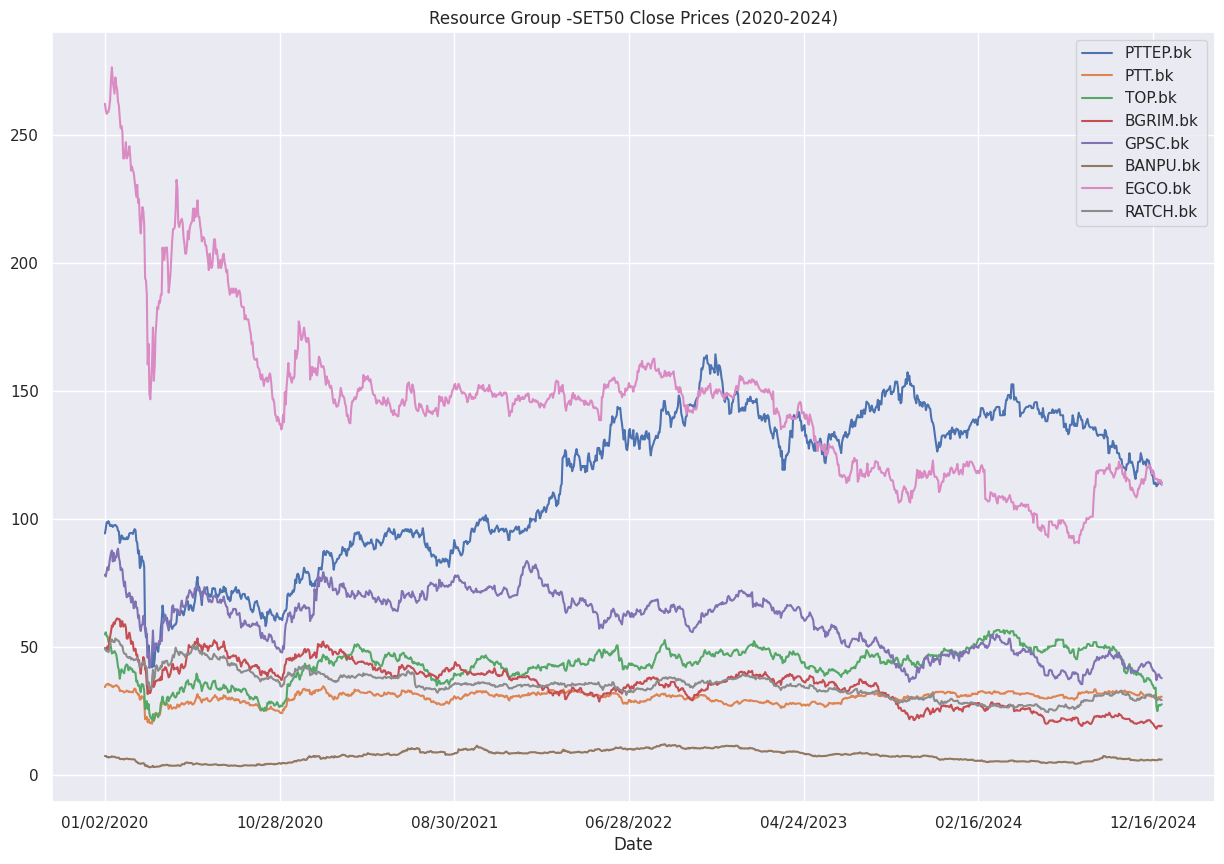

In [175]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title='Resource Group -SET50 Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Resource Group -SET50(Base 100)'}, xlabel='Date'>

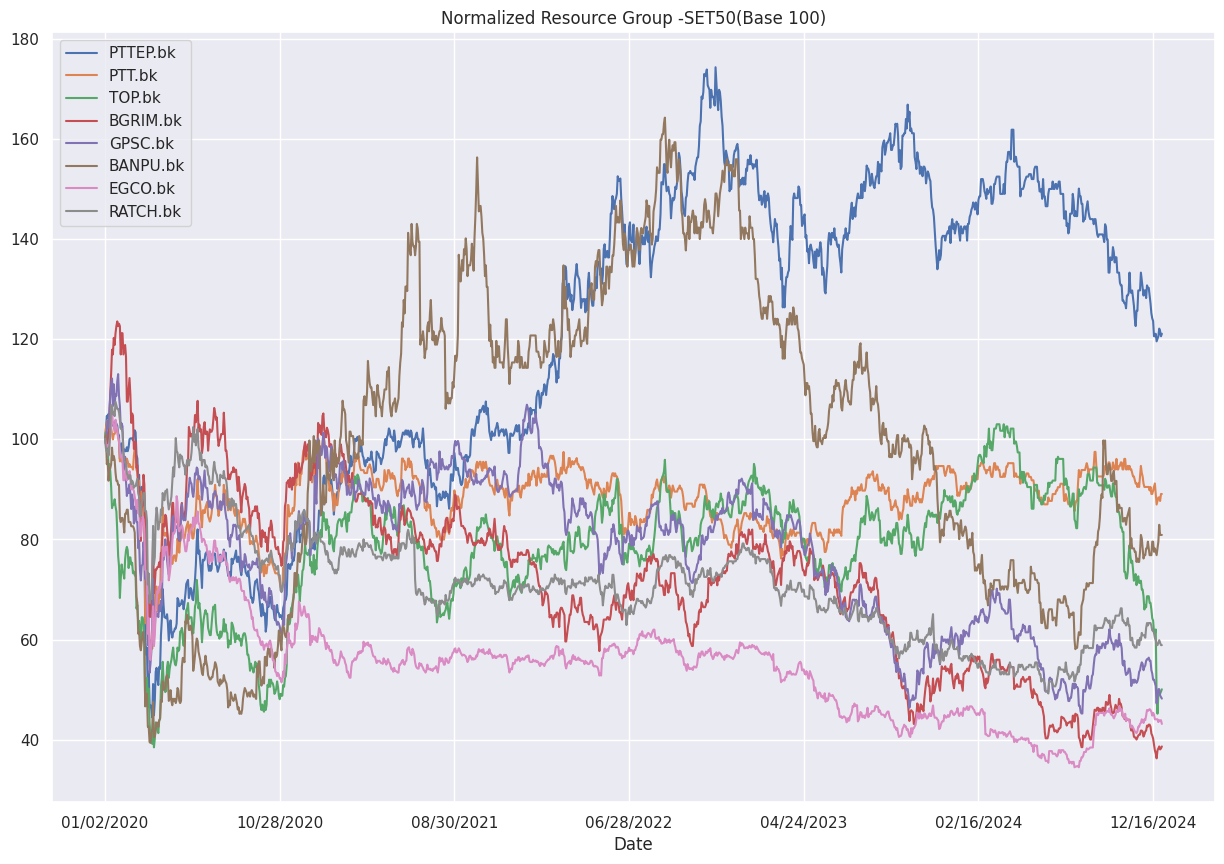

In [177]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Resource Group -SET50(Base 100)')


In [ ]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())

            PTTEP.bk    PTT.bk    TOP.bk  BGRIM.bk   GPSC.bk  BANPU.bk  \
Date                                                                     
01/04/2018  0.043380  0.047732 -0.004684  0.008231  0.000000  0.054877   
01/05/2018  0.009390 -0.008511  0.004684  0.016260  0.037740  0.009662   
01/08/2018 -0.014118 -0.004283 -0.023642 -0.016260 -0.016978 -0.014528   
01/09/2018  0.014118  0.000000 -0.004796  0.000000 -0.024265  0.047628   
01/10/2018  0.000000  0.008547 -0.044233  0.032261  0.013938  0.009259   

             EGCO.bk  RATCH.bk  
Date                            
01/04/2018 -0.013730  0.000000  
01/05/2018 -0.004619  0.000000  
01/08/2018  0.004619  0.000000  
01/09/2018 -0.004619  0.000000  
01/10/2018  0.009217  0.009132  


หุ้น PTTEP.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000266
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.021652
  - หมายความว่า โดยเฉลี่ยหุ้น PTTEP.bk มีการเปลี่ยนแปลงราคาประมาณ 0.0266% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.1652% ต่อวัน
--------------------------------------------------
หุ้น PTT.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000020
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.017089
  - หมายความว่า โดยเฉลี่ยหุ้น PTT.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0020% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.7089% ต่อวัน
--------------------------------------------------
หุ้น TOP.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000556
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.024083
  - หมายความว่า โดยเฉลี่ยหุ้น TOP.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0556% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.4083% ต่อวัน
--------------------------------------------------
หุ้น BGRIM.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000552
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.022694
  - หมายความว่า โดยเฉลี่ยหุ้น BGRIM.b

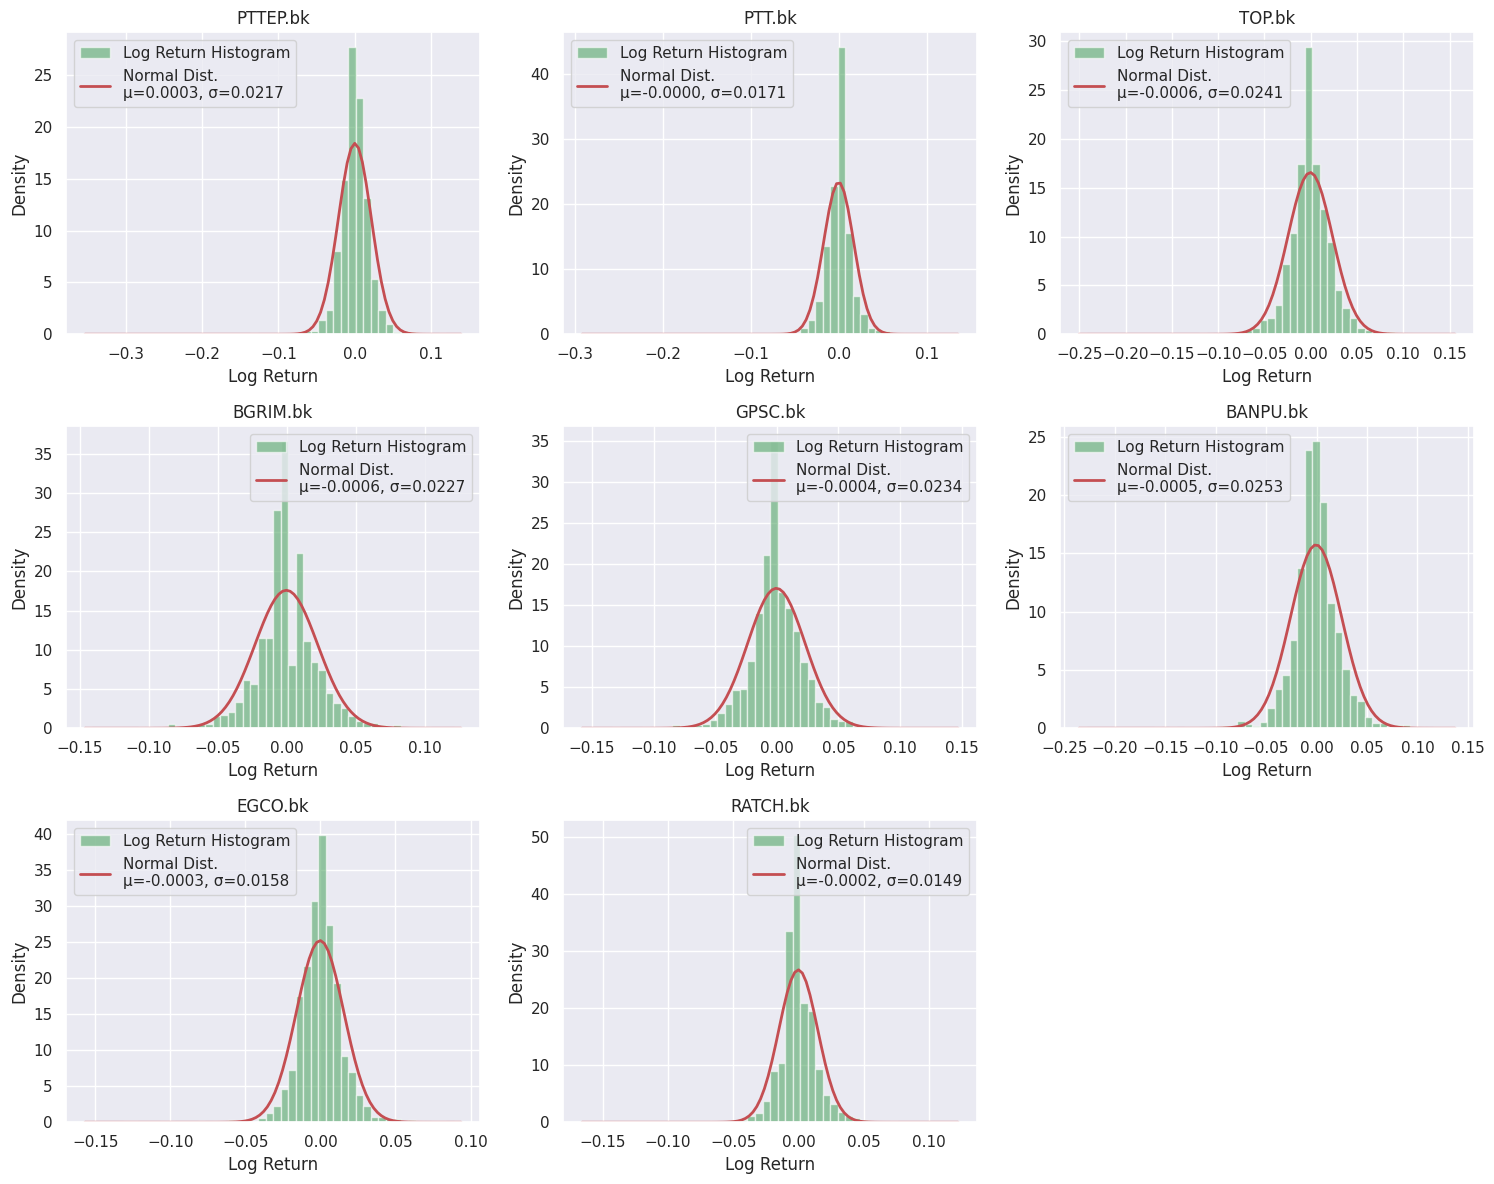

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# สมมติ rets และ symbols พร้อมแล้ว

n = len(symbols)
cols = 3  # เลือกจำนวน column ที่ต้องการ
rows = math.ceil(n / cols)  # คำนวณจำนวนแถวให้พอดี

plt.figure(figsize=(5 * cols, 4 * rows))  # ขยายขนาดให้พอดี

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    # Plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # Mean & Std
    mu, std = data.mean(), data.std()

    # Normal distribution
    x = np.linspace(data.min(), data.max(), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'{sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # Console Output
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()


PTTEP.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.70% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.91% ต่อวัน (Upside Potential)

PTT.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.24% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.44% ต่อวัน (Upside Potential)

TOP.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.55% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.45% ต่อวัน (Upside Potential)

BGRIM.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.61% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.59% ต่อวัน (Upside Potential)

GPSC.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.60% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.53% ต่อวัน (Upside Potential)

BANPU.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.59% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่

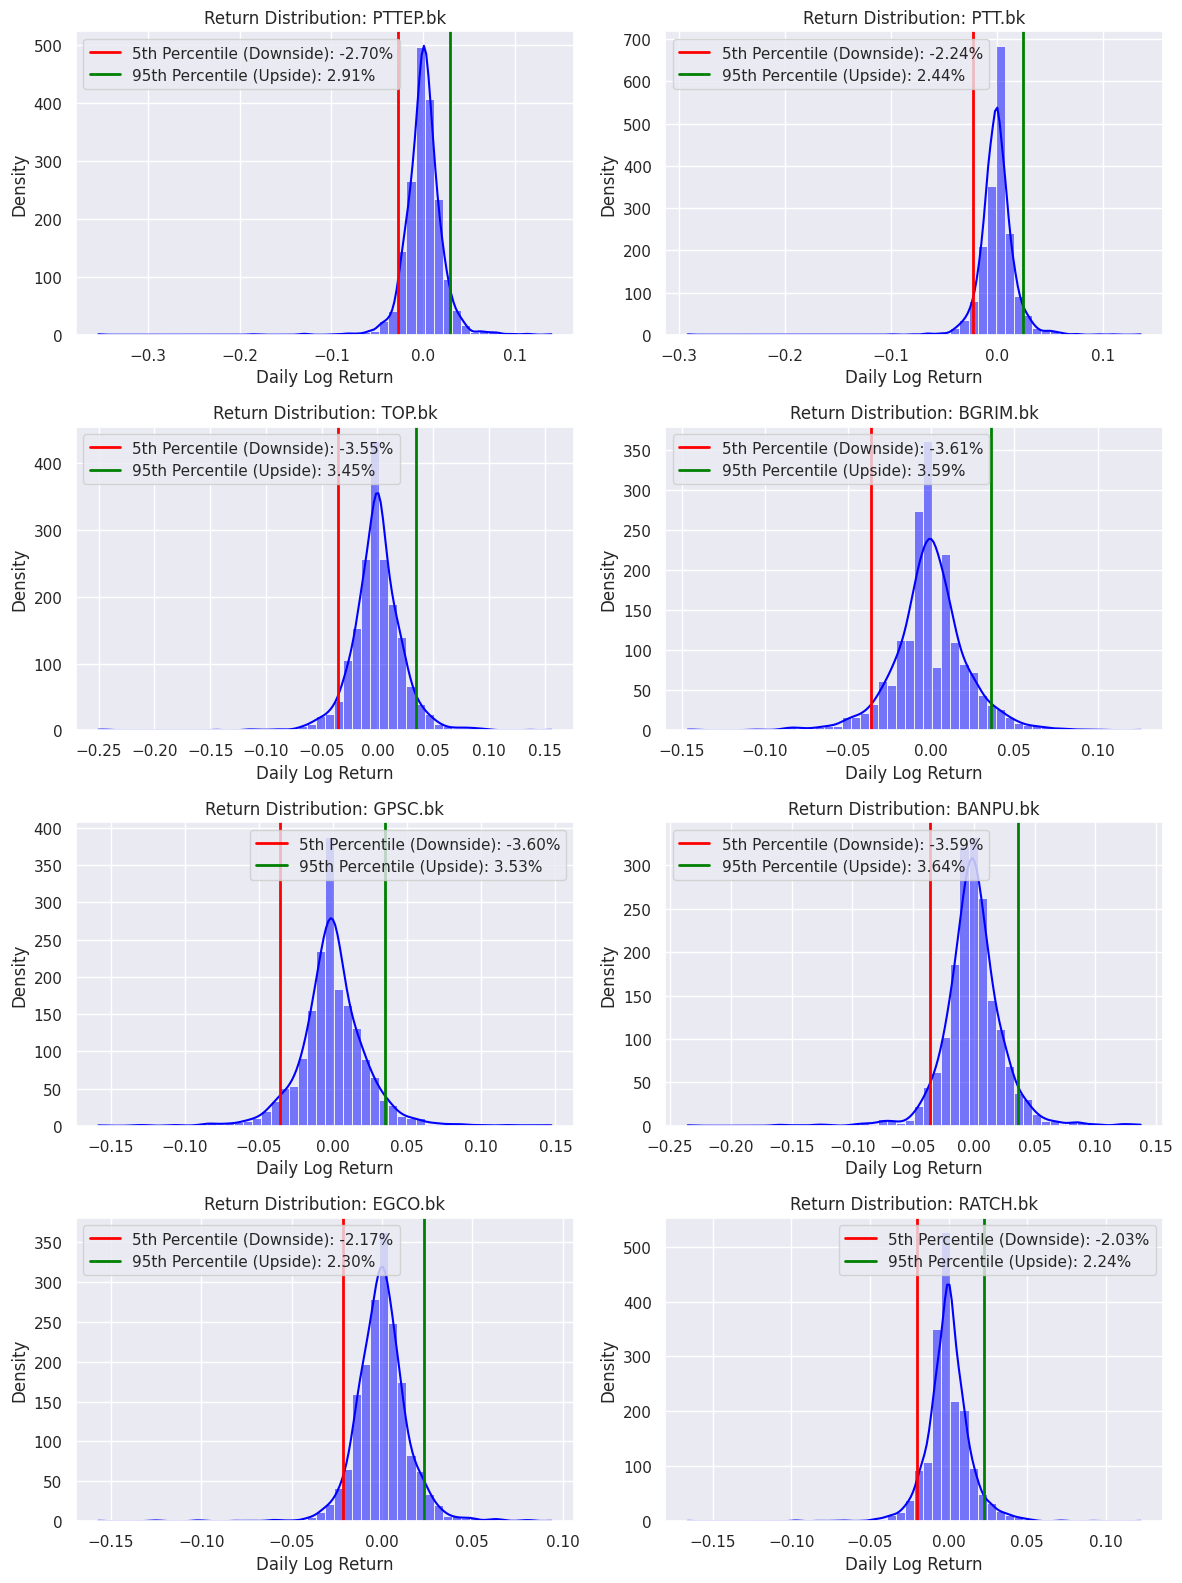

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



cols = 2  # กำหนดจำนวนคอลัมน์ที่ต้องการ
rows = math.ceil(len(symbols) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    sns.histplot(data, bins=50, color='blue', kde=True)

    p5 = np.percentile(data, 5) * 100
    p95 = np.percentile(data, 95) * 100

    plt.axvline(x=p5 / 100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95 / 100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # พิมพ์ผลลัพธ์
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()


image.png

In [178]:
import yfinance as yf
import pandas as pd

symbols = ['KBANK.bk','TTB.bk','BBL.bk','KTB.bk','SAWAD.bk','TISCO.bk','KTC.bk','MTC.bk']


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()


start_date = '2020-01-01'
end_date = '2024-12-31'

for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())

กำลังดึงข้อมูลของ KBANK.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ TTB.bk ...
กำลังดึงข้อมูลของ BBL.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ KTB.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ SAWAD.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ TISCO.bk ...
กำลังดึงข้อมูลของ KTC.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ MTC.bk ...


[*********************100%***********************]  1 of 1 completed

         Date    KBANK.bk    TTB.bk      BBL.bk     KTB.bk   SAWAD.bk  \
0  01/02/2020  119.946983  1.290444  130.011841  12.578184  49.488056   
1  01/03/2020  119.165588  1.282763  127.626305  12.578184  49.669998   
2  01/06/2020  112.132858  1.221313  124.047997  12.427546  48.760288   
3  01/07/2020  111.742149  1.221313  124.445595  12.352228  51.125530   
4  01/08/2020  109.397903  1.182907  121.662476  12.126272  50.579704   

    TISCO.bk     KTC.bk     MTC.bk  
0  62.797596  34.366795  60.274734  
1  63.106949  33.929001  60.743797  
2  62.178909  33.053413  59.805679  
3  62.488255  33.272312  58.398479  
4  62.178909  32.396721  56.756756  


<Axes: title={'center': 'Finance Group-SET50 Close Prices (2020-2024)'}, xlabel='Date'>

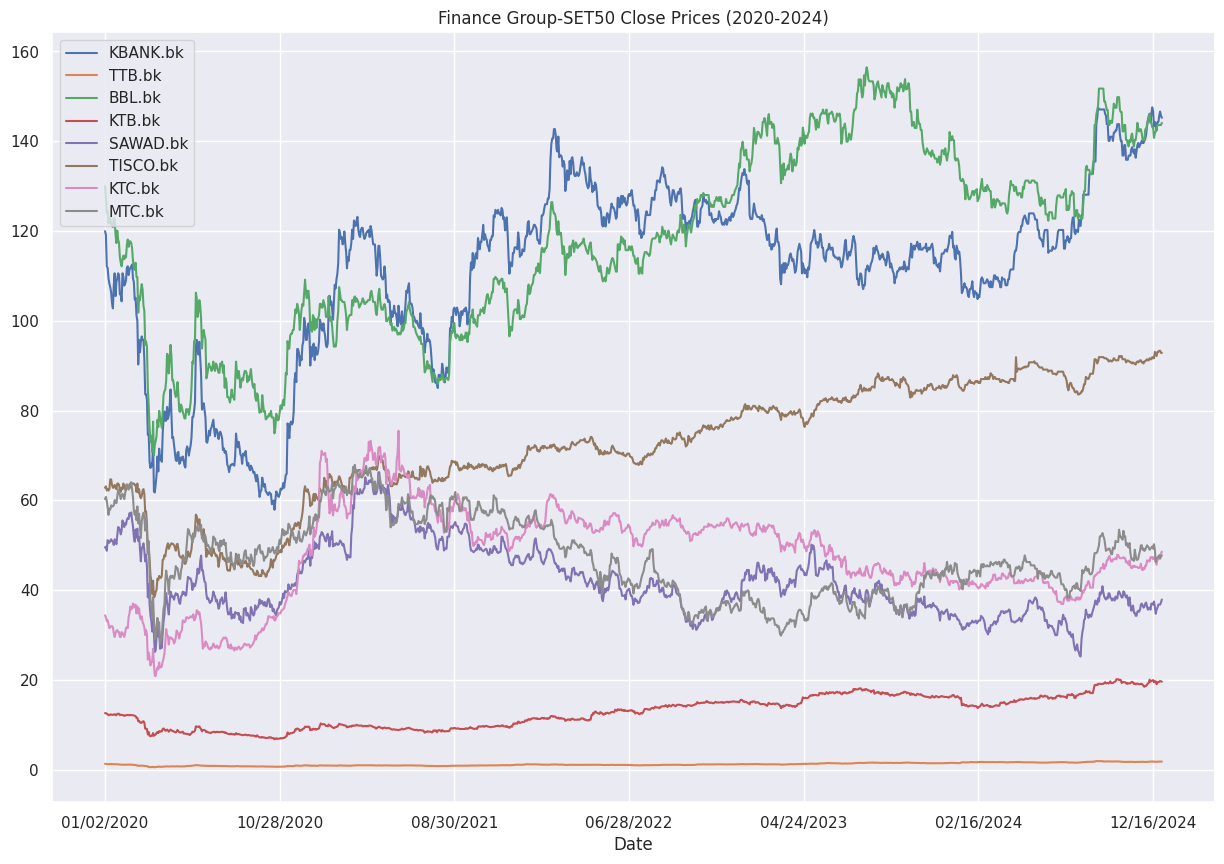

In [179]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title='Finance Group-SET50 Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Finance Group-SET50 (Base 100)'}, xlabel='Date'>

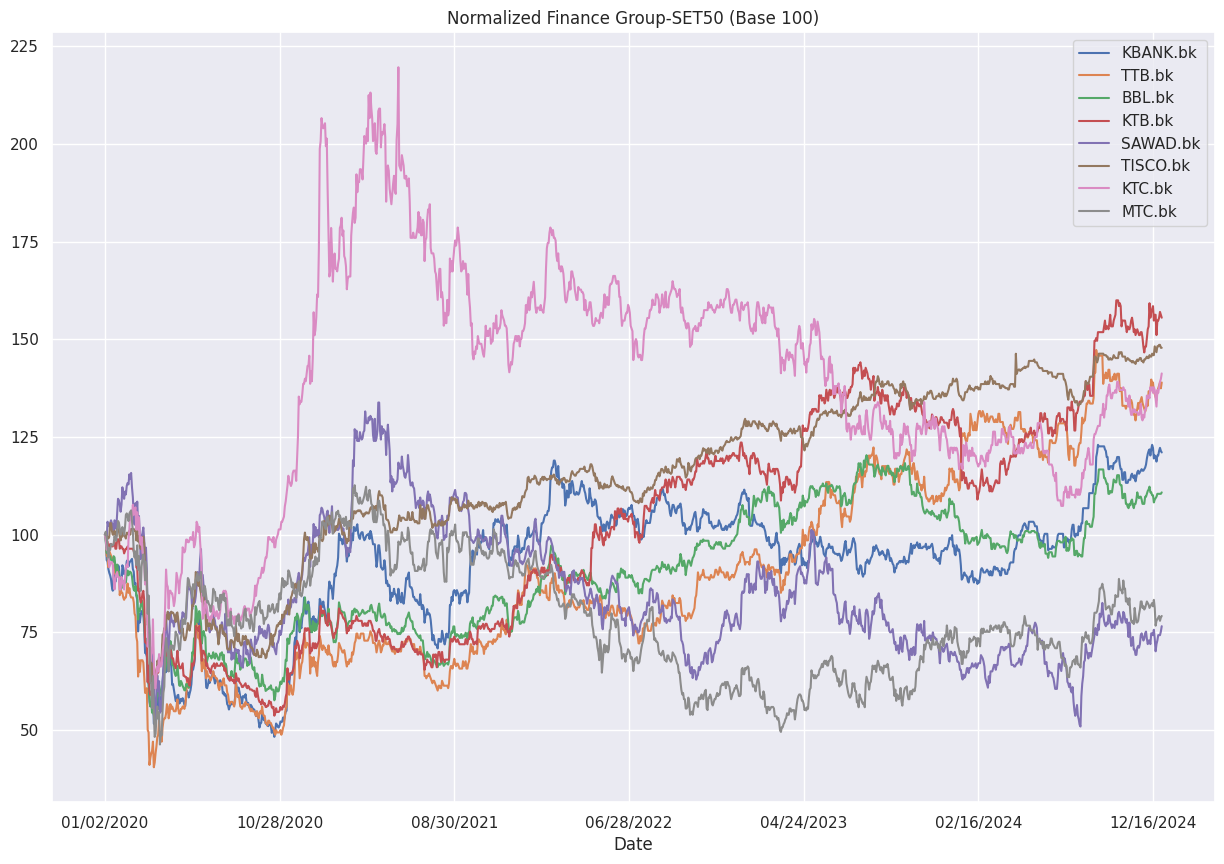

In [180]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Finance Group-SET50 (Base 100)')


In [ ]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())

            KBANK.bk    TTB.bk    BBL.bk    KTB.bk  SAWAD.bk  TISCO.bk  \
Date                                                                     
01/04/2018  0.020878  0.000000  0.000000  0.015346  0.029414  0.008345   
01/05/2018 -0.004141 -0.013072  0.004866  0.010101 -0.025689  0.011019   
01/08/2018  0.000000 -0.006601  0.004843  0.000000 -0.014982  0.021681   
01/09/2018 -0.025211  0.006601  0.004819  0.029705 -0.034552  0.005348   
01/10/2018 -0.008547 -0.006601 -0.009662 -0.009804  0.007782 -0.002670   

              KTC.bk    MTC.bk  
Date                            
01/04/2018 -0.019152  0.036814  
01/05/2018 -0.056834 -0.024392  
01/08/2018  0.031657 -0.012423  
01/09/2018 -0.002837  0.000000  
01/10/2018  0.076540 -0.012579  


หุ้น KBANK.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000090
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.018697
  - หมายความว่า โดยเฉลี่ยหุ้น KBANK.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0090% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.8697% ต่อวัน
--------------------------------------------------
หุ้น TTB.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000024
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.019545
  - หมายความว่า โดยเฉลี่ยหุ้น TTB.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0024% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.9545% ต่อวัน
--------------------------------------------------
หุ้น BBL.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000060
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.015374
  - หมายความว่า โดยเฉลี่ยหุ้น BBL.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0060% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.5374% ต่อวัน
--------------------------------------------------
หุ้น KTB.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000258
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.015890
  - หมายความว่า โดยเฉลี่ยหุ้น KTB.bk ม

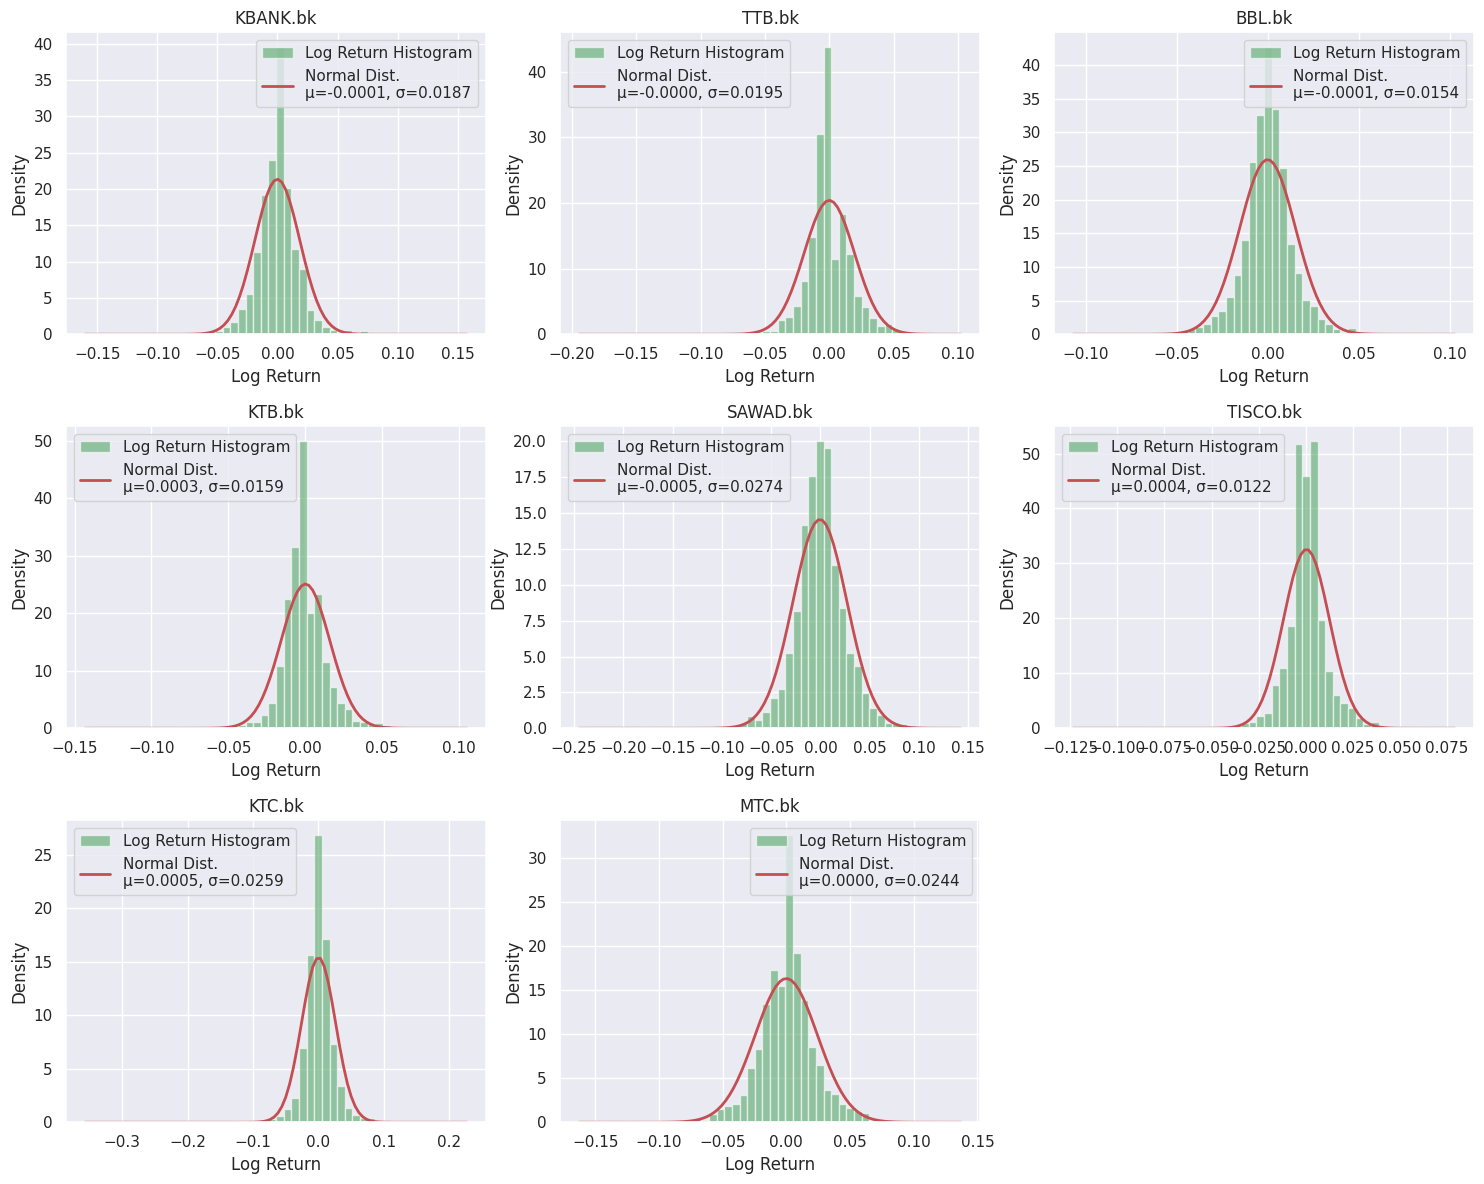

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# สมมติ rets และ symbols พร้อมแล้ว

n = len(symbols)
cols = 3  # เลือกจำนวน column ที่ต้องการ
rows = math.ceil(n / cols)  # คำนวณจำนวนแถวให้พอดี

plt.figure(figsize=(5 * cols, 4 * rows))  # ขยายขนาดให้พอดี

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    # Plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # Mean & Std
    mu, std = data.mean(), data.std()

    # Normal distribution
    x = np.linspace(data.min(), data.max(), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'{sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # Console Output
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()


KBANK.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.67% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.50% ต่อวัน (Upside Potential)

TTB.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.66% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.93% ต่อวัน (Upside Potential)

BBL.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.28% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.30% ต่อวัน (Upside Potential)

KTB.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 1.95% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.45% ต่อวัน (Upside Potential)

SAWAD.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 4.03% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 4.13% ต่อวัน (Upside Potential)

TISCO.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 1.59% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่ห

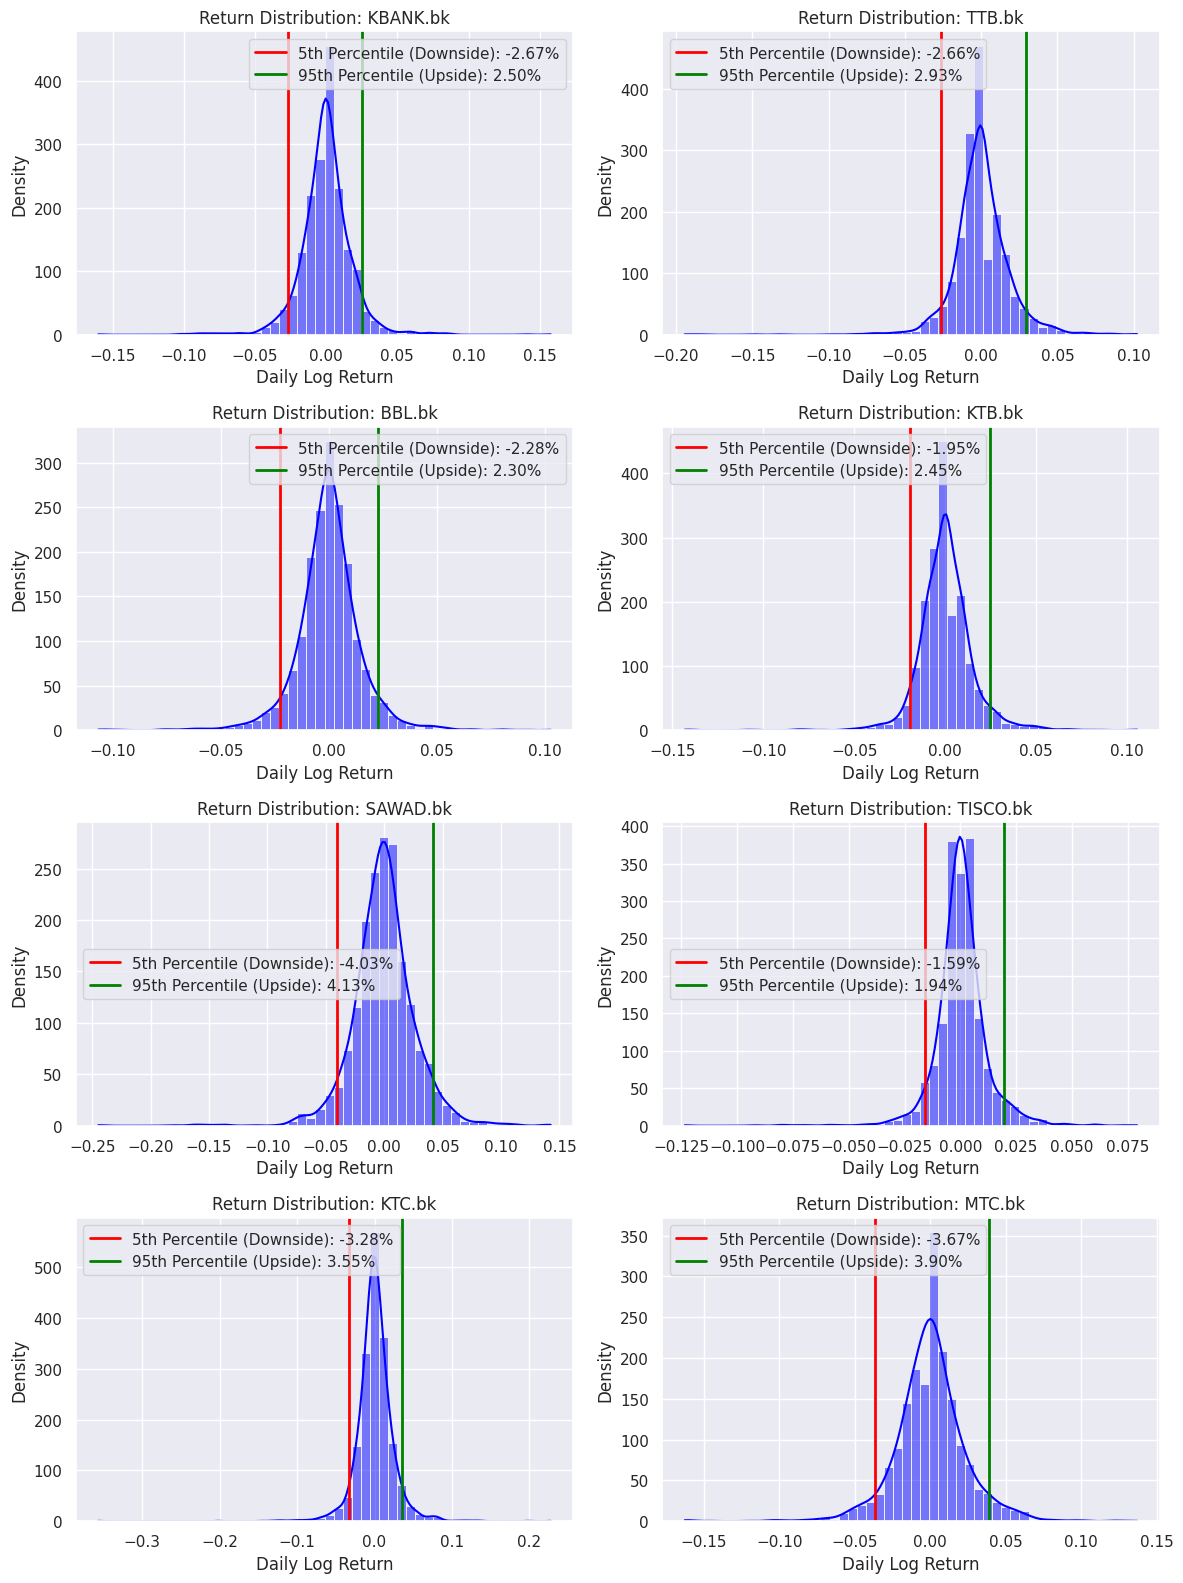

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



cols = 2  # กำหนดจำนวนคอลัมน์ที่ต้องการ
rows = math.ceil(len(symbols) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    sns.histplot(data, bins=50, color='blue', kde=True)

    p5 = np.percentile(data, 5) * 100
    p95 = np.percentile(data, 95) * 100

    plt.axvline(x=p5 / 100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95 / 100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # พิมพ์ผลลัพธ์
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()


image.png

In [181]:
import yfinance as yf
import pandas as pd

symbols = ['AOT.bk','CPALL.bk','BH.bk','BDMS.bk','MINT.bk','BEM.bk','HMPRO.bk','BTS.bk','COM7.bk','VGI.bk','BJC.bk','GLOBAL.bk','PTTGC.bk']


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()

start_date = '2020-01-01'
end_date = '2024-12-31'

for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())

กำลังดึงข้อมูลของ AOT.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ CPALL.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BH.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BDMS.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

กำลังดึงข้อมูลของ MINT.bk ...



[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BEM.bk ...
กำลังดึงข้อมูลของ HMPRO.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BTS.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ COM7.bk ...


[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ VGI.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ BJC.bk ...
กำลังดึงข้อมูลของ GLOBAL.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

กำลังดึงข้อมูลของ PTTGC.bk ...
         Date     AOT.bk   CPALL.bk       BH.bk    BDMS.bk    MINT.bk  \
0  01/02/2020  73.417572  64.390228  129.600632  22.960110  33.552921   
1  01/03/2020  72.198013  65.070412  125.177399  22.085440  33.318283   
2  01/06/2020  70.490631  64.616951  122.523468  22.085440  31.675831   
3  01/07/2020  71.954102  65.523857  125.177399  22.304111  32.614380   
4  01/08/2020  71.222366  65.750587  124.292747  22.085440  31.441202   

      BEM.bk   HMPRO.bk     BTS.bk    COM7.bk    VGI.bk     BJC.bk  GLOBAL.bk  \
0   9.986239  13.484516  11.570140  10.570523  8.989798  35.599766  11.942805   
1  10.077857  13.654132  11.483796  10.443676  8.898532  36.468056  11.646090   
2   9.986239  13.569324  11.311109  10.401394  8.670363  36.033909  11.423553   
3  10.352709  13.569324  11.656486  10.359112  8.670363  36.685127  10.978479   
4  10.261090  13.399706  11.570140   9.978573  8.624730  36.468056  10.681764   

    PTTGC.bk  
0  49.692623  
1  49.902298 

<Axes: title={'center': 'Services Group-SET50 Close Prices (2020-2024)'}, xlabel='Date'>

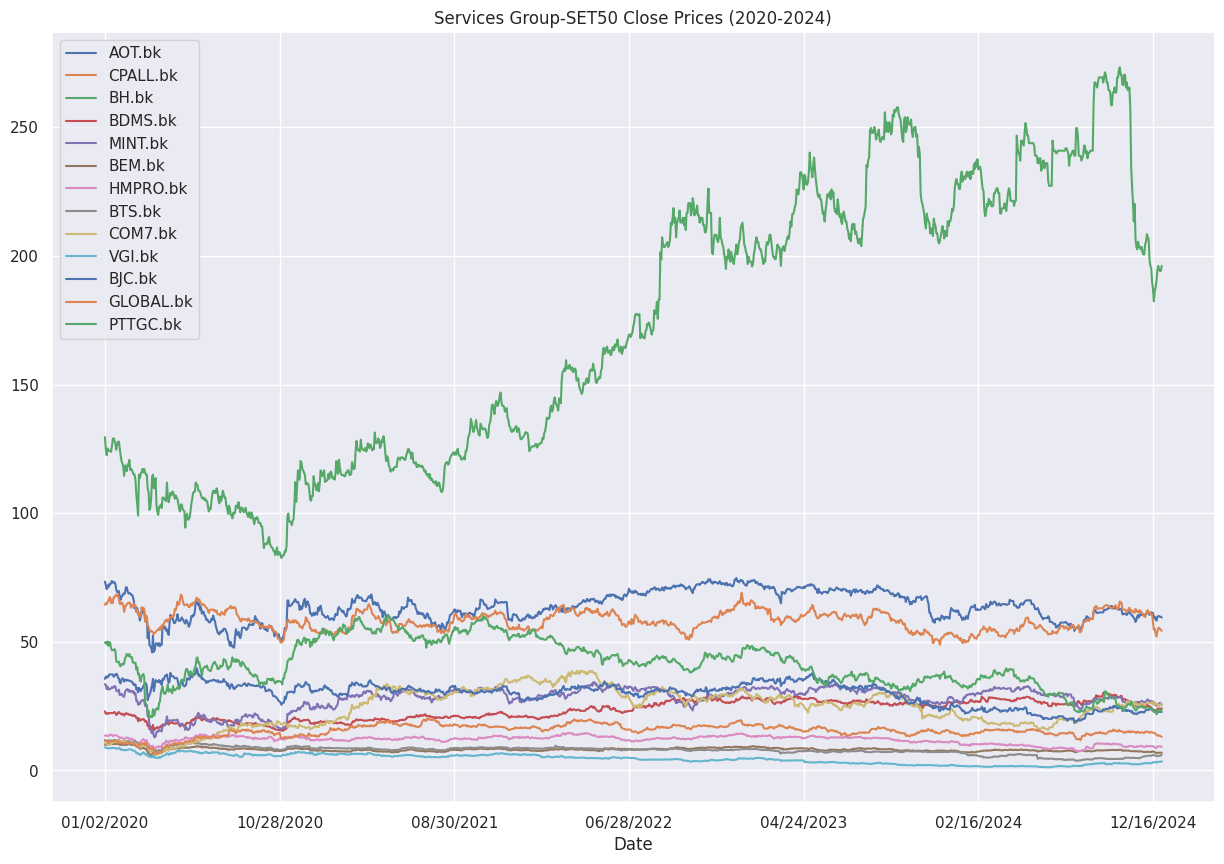

In [182]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title='Services Group-SET50 Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Services Group-SET50 (Base 100)'}, xlabel='Date'>

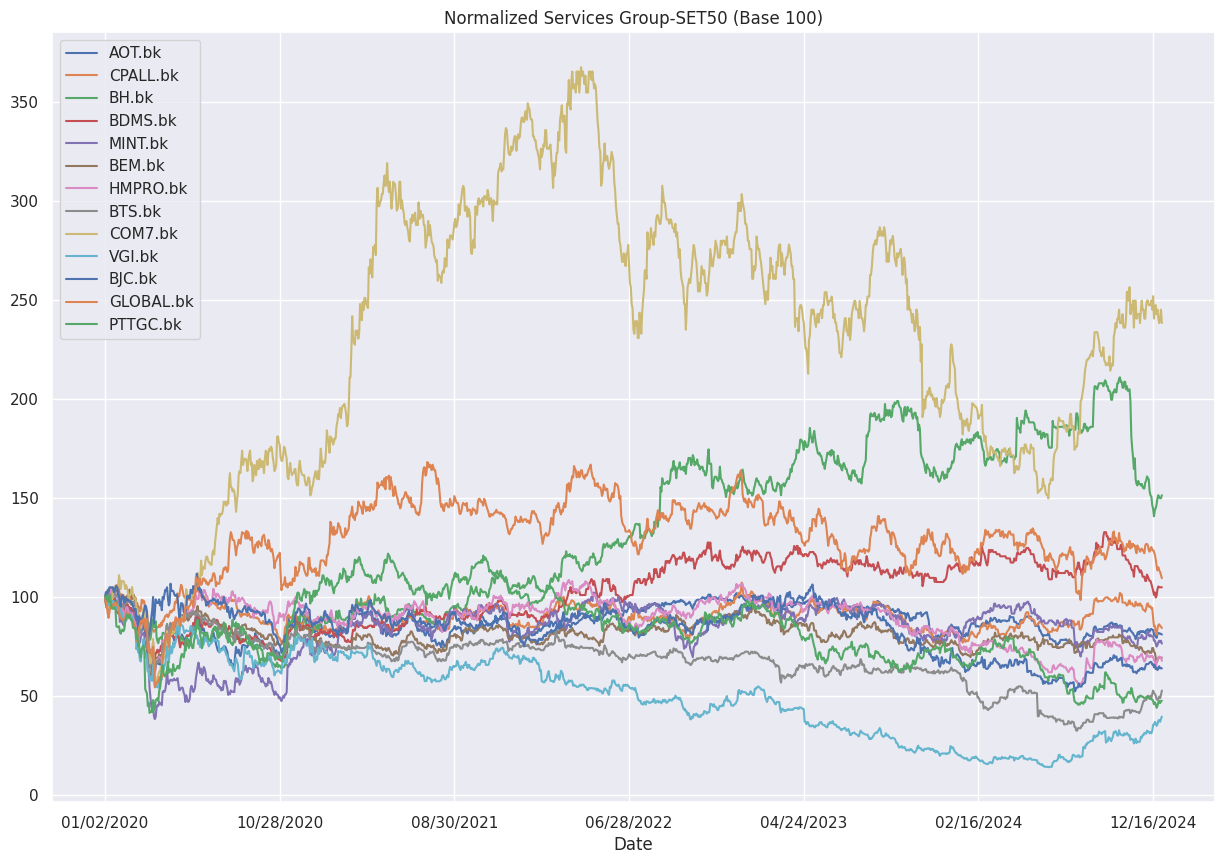

In [183]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Services Group-SET50 (Base 100)')


In [ ]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())

              AOT.bk  CPALL.bk     BH.bk   BDMS.bk   MINT.bk    BEM.bk  \
Date                                                                     
01/04/2018  0.000000  0.000000  0.010363  0.004751 -0.034887 -0.006473   
01/05/2018  0.021053 -0.009600 -0.007762 -0.009524 -0.023953  0.025642   
01/08/2018  0.030772 -0.016208 -0.013072  0.004773  0.018018 -0.012739   
01/09/2018 -0.013560 -0.003273  0.010471  0.000000  0.011834  0.006390   
01/10/2018 -0.027683  0.016260  0.040822  0.004751  0.005865 -0.019293   

            HMPRO.bk    BTS.bk   COM7.bk    VGI.bk    BJC.bk  GLOBAL.bk  \
Date                                                                      
01/04/2018 -0.007663  0.000000 -0.025318 -0.007722 -0.015444   0.011174   
01/05/2018  0.000000 -0.006042  0.006390  0.007722 -0.003899  -0.011174   
01/08/2018  0.022815  0.006042 -0.012821  0.007663 -0.048009  -0.016997   
01/09/2018  0.051293  0.017911 -0.006472  0.030078 -0.024898   0.022600   
01/10/2018 -0.028988 -0.011905 

หุ้น AOT.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000480
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.017395
  - หมายความว่า โดยเฉลี่ยหุ้น AOT.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0480% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.7395% ต่อวัน
--------------------------------------------------
หุ้น CPALL.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000237
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.013980
  - หมายความว่า โดยเฉลี่ยหุ้น CPALL.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0237% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.3980% ต่อวัน
--------------------------------------------------
หุ้น BH.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000107
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.018068
  - หมายความว่า โดยเฉลี่ยหุ้น BH.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0107% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.8068% ต่อวัน
--------------------------------------------------
หุ้น BDMS.bk:
  - ค่าเฉลี่ยของ Log Return (μ): 0.000092
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.015642
  - หมายความว่า โดยเฉลี่ยหุ้น BDMS.bk ม

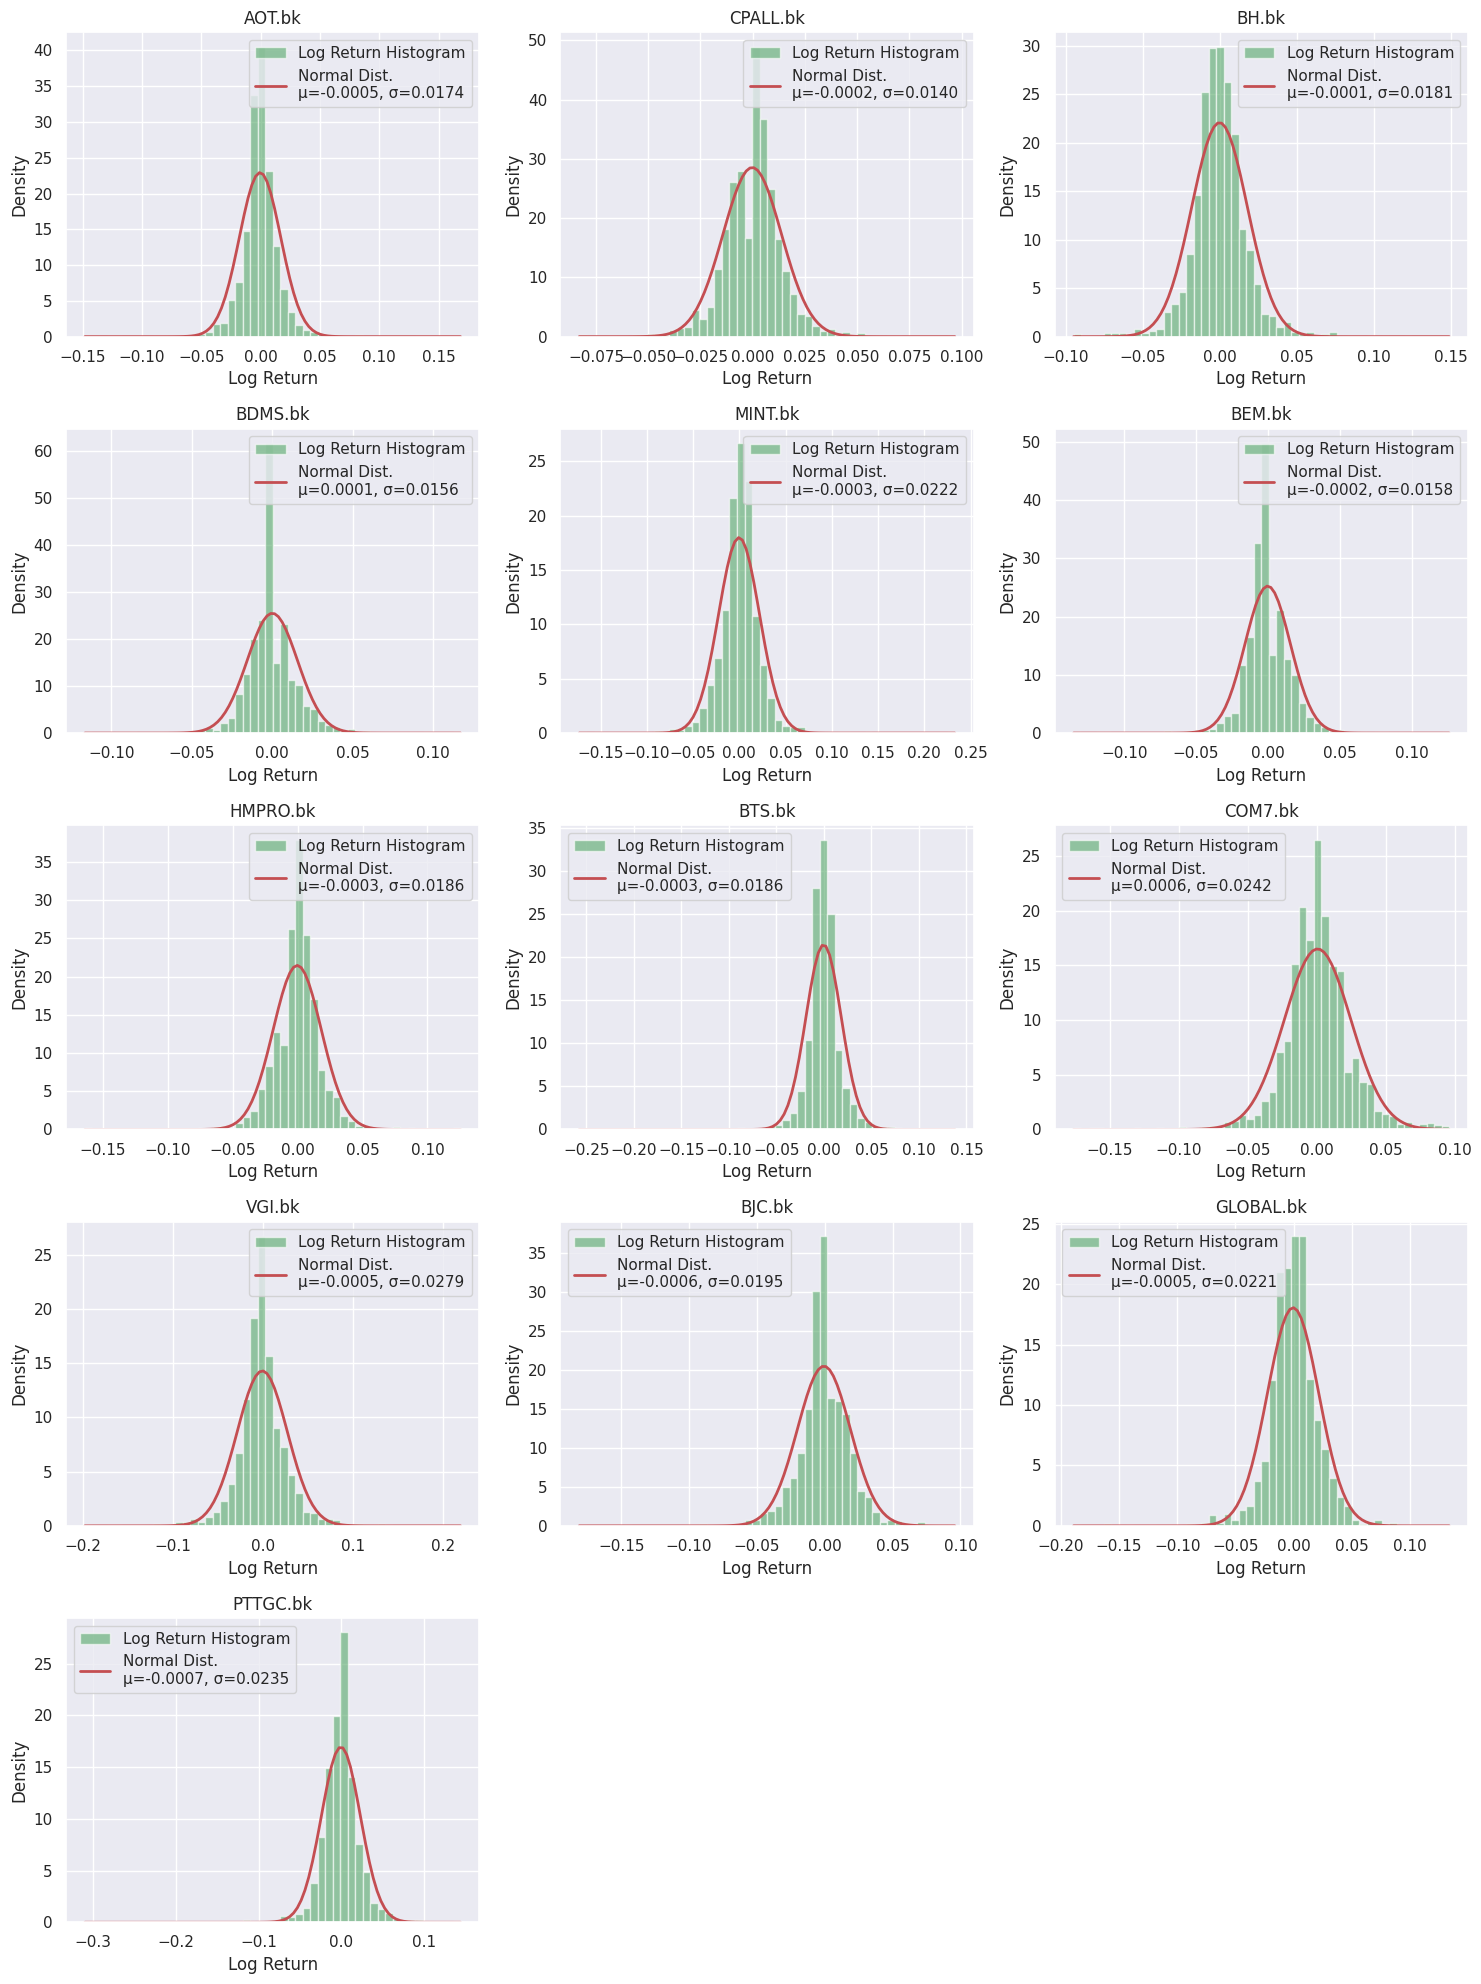

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# สมมติ rets และ symbols พร้อมแล้ว

n = len(symbols)
cols = 3  # เลือกจำนวน column ที่ต้องการ
rows = math.ceil(n / cols)  # คำนวณจำนวนแถวให้พอดี

plt.figure(figsize=(5 * cols, 4 * rows))  # ขยายขนาดให้พอดี

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    # Plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # Mean & Std
    mu, std = data.mean(), data.std()

    # Normal distribution
    x = np.linspace(data.min(), data.max(), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'{sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # Console Output
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()


AOT.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.48% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.31% ต่อวัน (Upside Potential)

CPALL.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.15% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.10% ต่อวัน (Upside Potential)

BH.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.65% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.66% ต่อวัน (Upside Potential)

BDMS.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.11% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.56% ต่อวัน (Upside Potential)

MINT.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.28% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.09% ต่อวัน (Upside Potential)

BEM.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.29% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้น

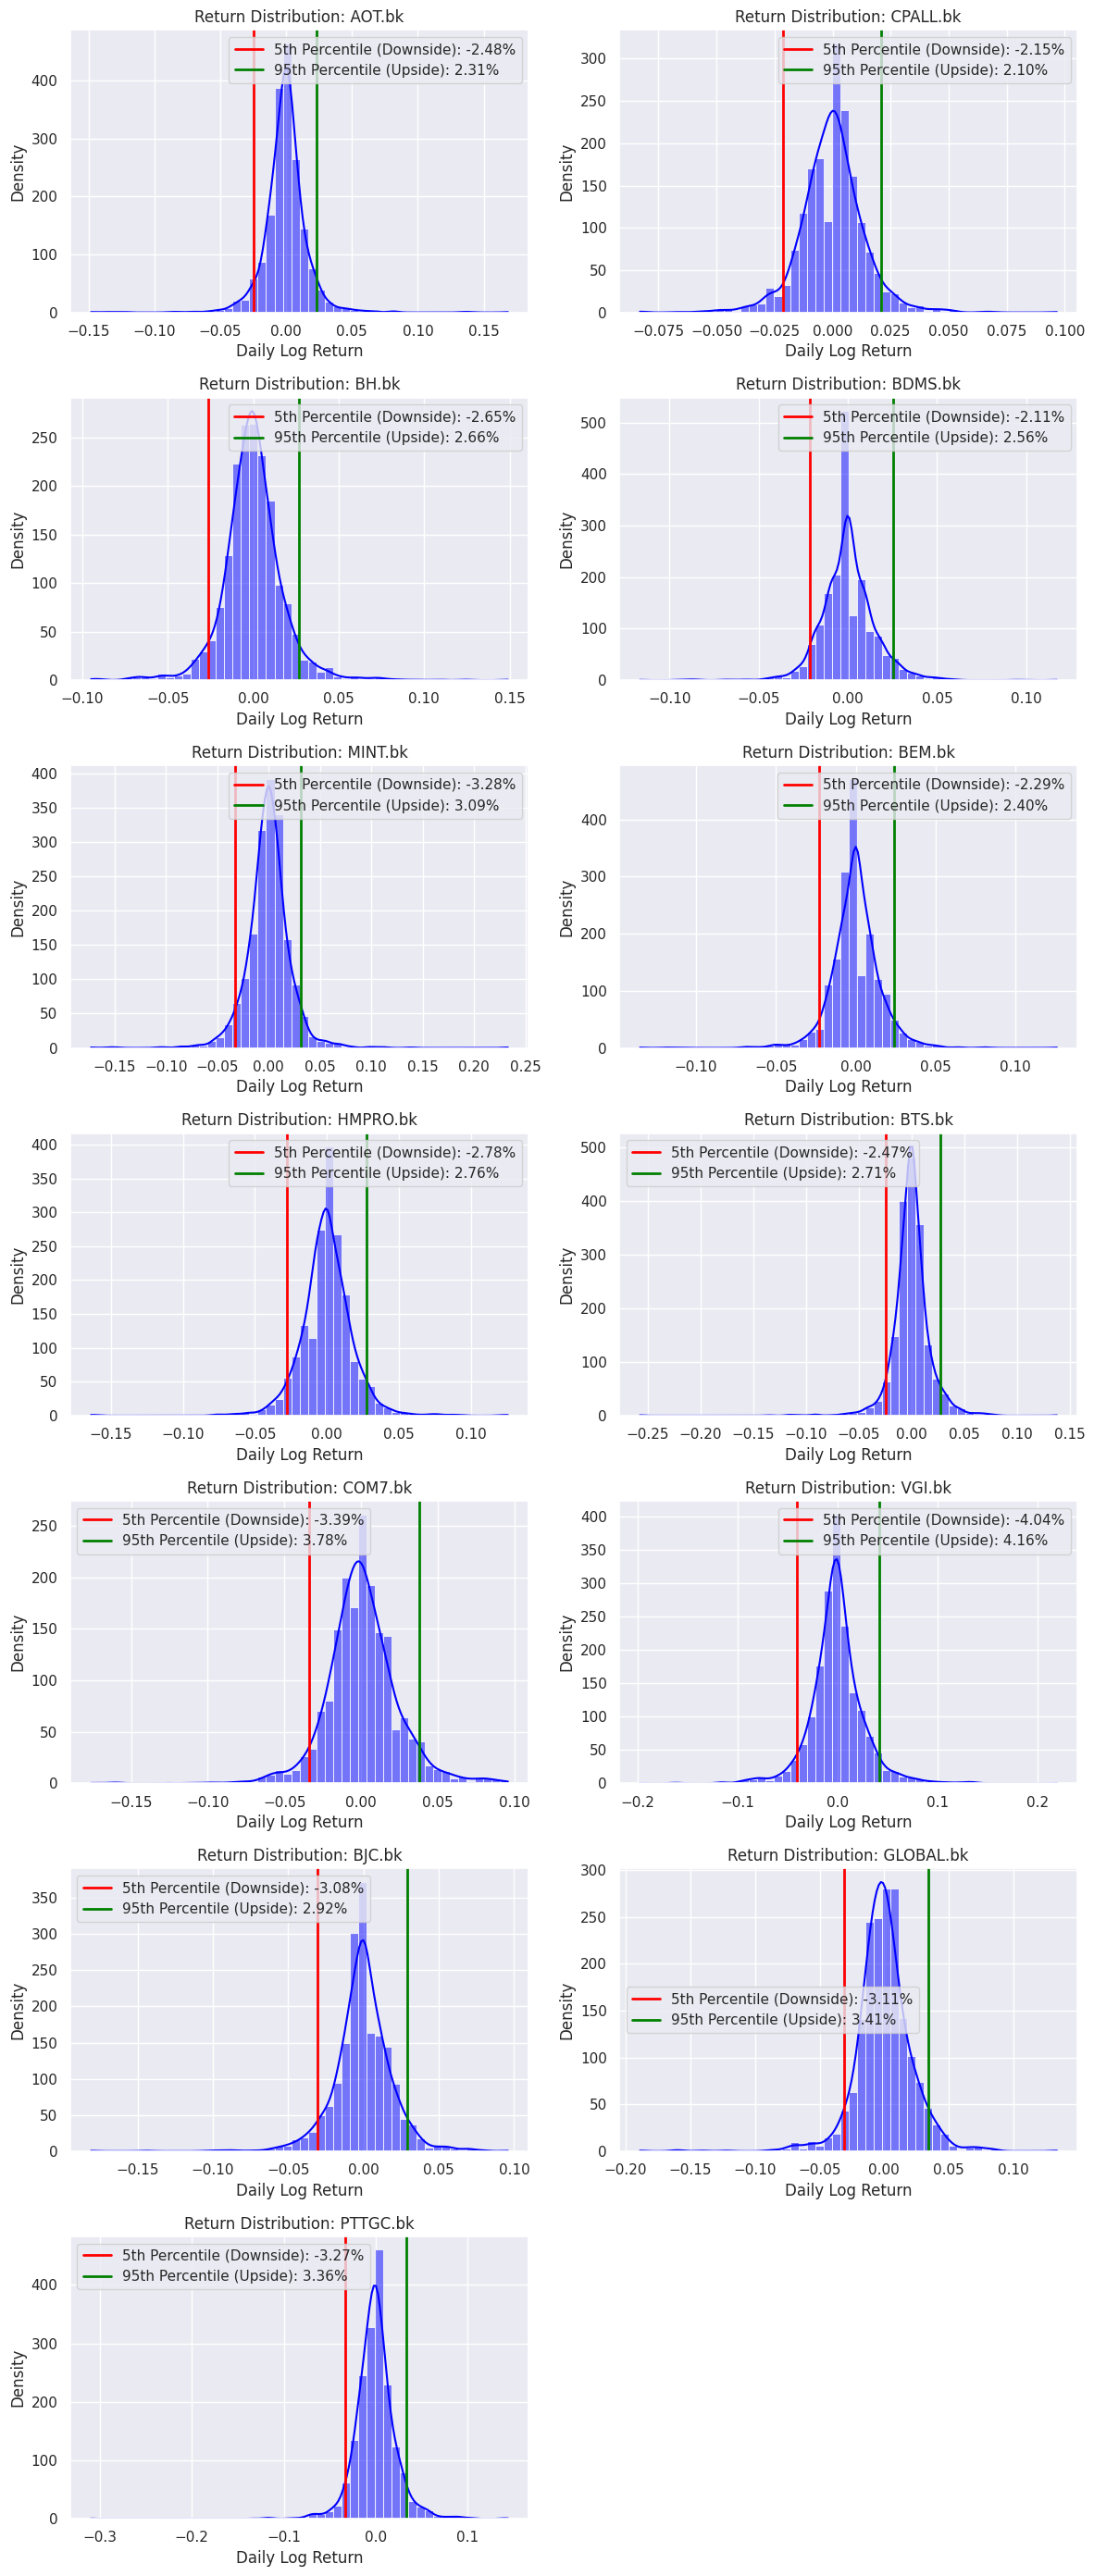

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



cols = 2  # กำหนดจำนวนคอลัมน์ที่ต้องการ
rows = math.ceil(len(symbols) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    sns.histplot(data, bins=50, color='blue', kde=True)

    p5 = np.percentile(data, 5) * 100
    p95 = np.percentile(data, 95) * 100

    plt.axvline(x=p5 / 100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95 / 100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # พิมพ์ผลลัพธ์
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()


image.png

In [184]:
import yfinance as yf
import pandas as pd

symbols = ['PTTGC.bk','IVL.bk']


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()

start_date = '2020-01-01'
end_date = '2024-12-31'

for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())

[*********************100%***********************]  1 of 1 completed

กำลังดึงข้อมูลของ PTTGC.bk ...
กำลังดึงข้อมูลของ IVL.bk ...



[*********************100%***********************]  1 of 1 completed

         Date   PTTGC.bk     IVL.bk
0  01/02/2020  49.692623  30.935827
1  01/03/2020  49.902298  31.149174
2  01/06/2020  49.063606  28.375620
3  01/07/2020  50.111973  28.375620
4  01/08/2020  48.434582  26.028767


<Axes: title={'center': 'Industry group-SET50 Close Prices (2020-2024)'}, xlabel='Date'>

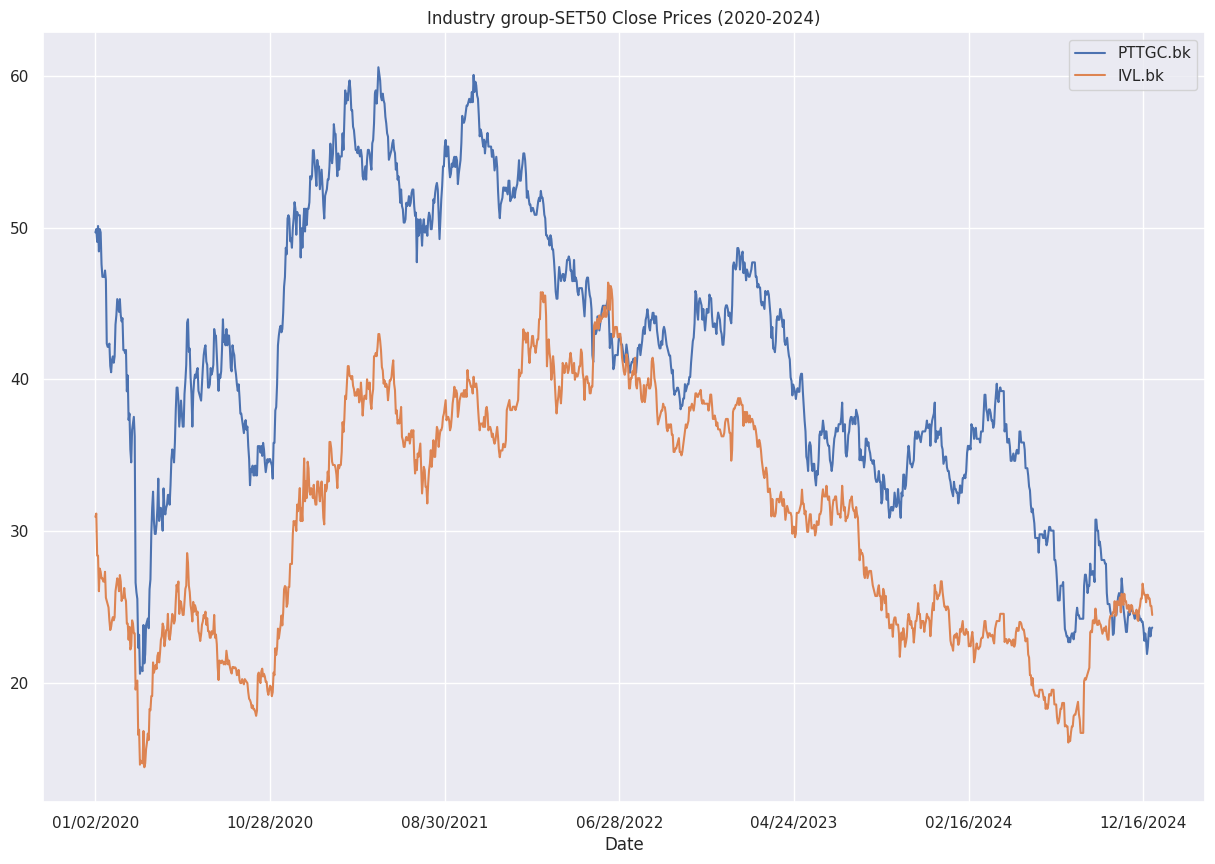

In [185]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title='Industry group-SET50 Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Industry group-SET50 (Base 100)'}, xlabel='Date'>

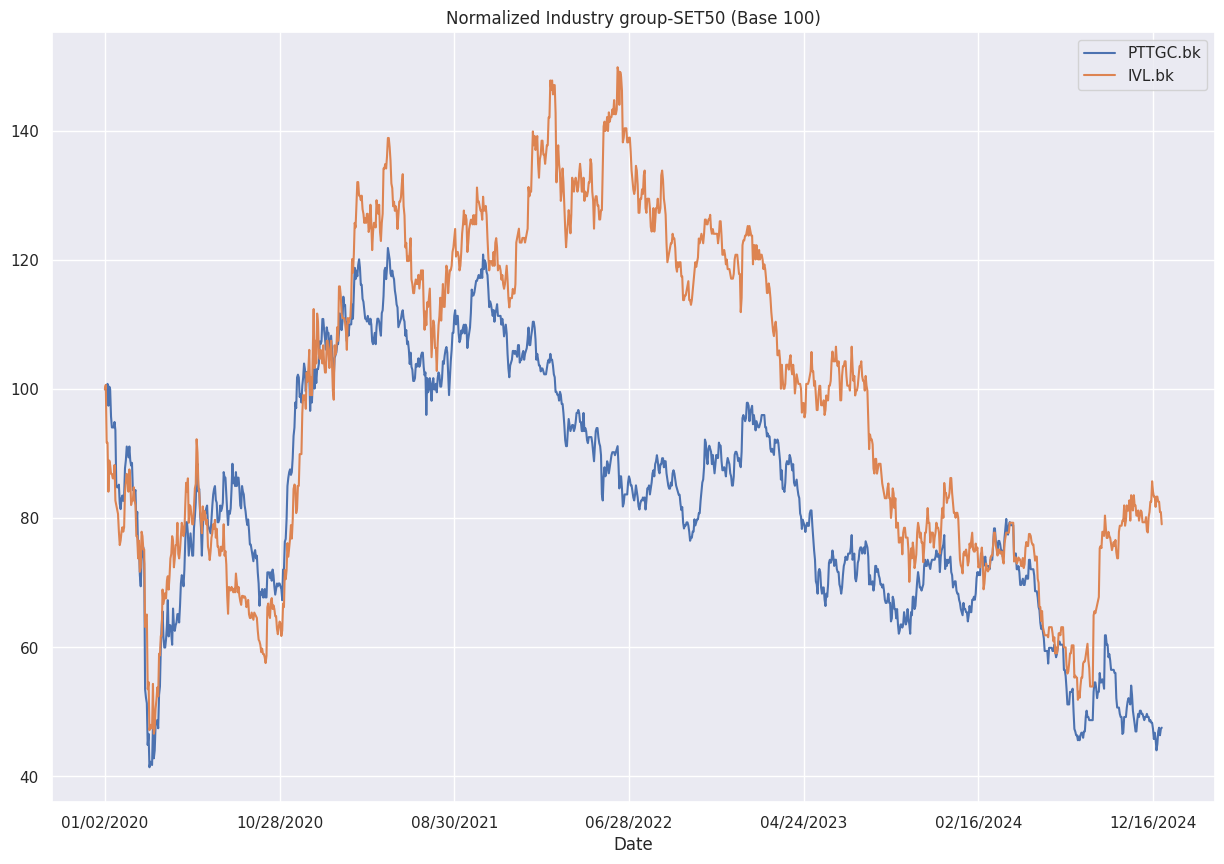

In [186]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Industry group-SET50 (Base 100)')


In [ ]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())

            PTTGC.bk    IVL.bk
Date                          
01/04/2018  0.036989  0.013363
01/05/2018  0.008345  0.021882
01/08/2018 -0.011142 -0.030771
01/09/2018  0.041158  0.022076
01/10/2018 -0.002692 -0.022076


หุ้น PTTGC.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000663
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.023532
  - หมายความว่า โดยเฉลี่ยหุ้น PTTGC.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0663% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.3532% ต่อวัน
--------------------------------------------------
หุ้น IVL.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000449
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.025573
  - หมายความว่า โดยเฉลี่ยหุ้น IVL.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0449% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.5573% ต่อวัน
--------------------------------------------------


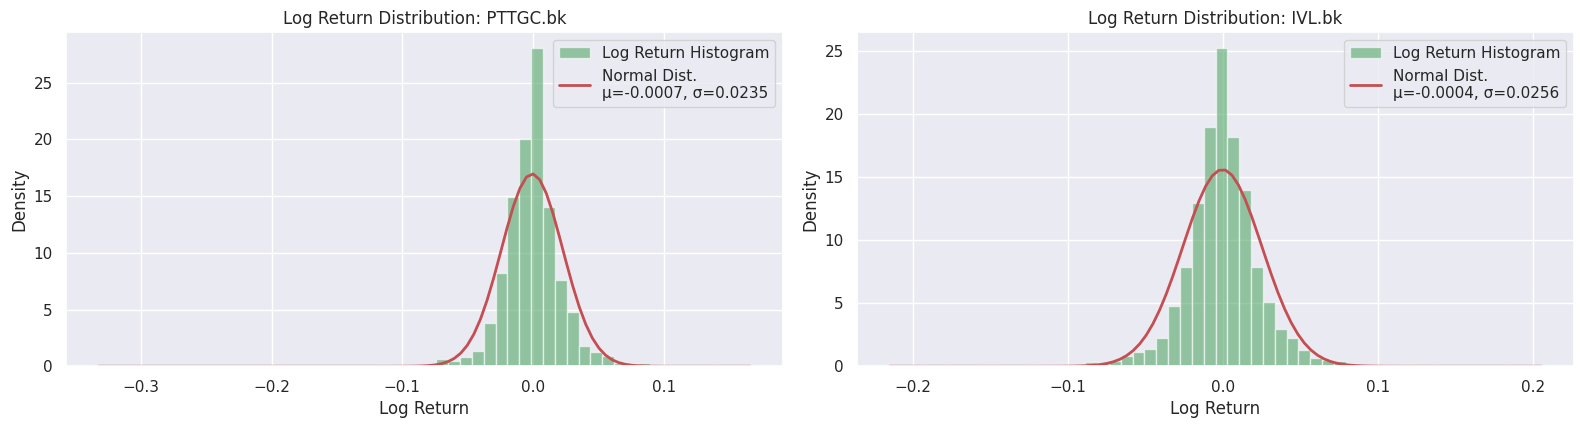

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# สมมติ rets คือ log return ที่คำนวณไว้แล้ว (DataFrame)



plt.figure(figsize=(16, 12))

for i, sym in enumerate(symbols, 1):
    plt.subplot(3, 2, i)

    data = rets[sym]

    # plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # คำนวณ mean กับ std
    mu, std = data.mean(), data.std()

    # สร้างช่วง x
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    # คำนวณ PDF normal distribution
    p = stats.norm.pdf(x, mu, std)

    # plot normal distribution
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'Log Return Distribution: {sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # แสดงผลทาง console
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()

PTTGC.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.27% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.36% ต่อวัน (Upside Potential)

IVL.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 3.79% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.89% ต่อวัน (Upside Potential)



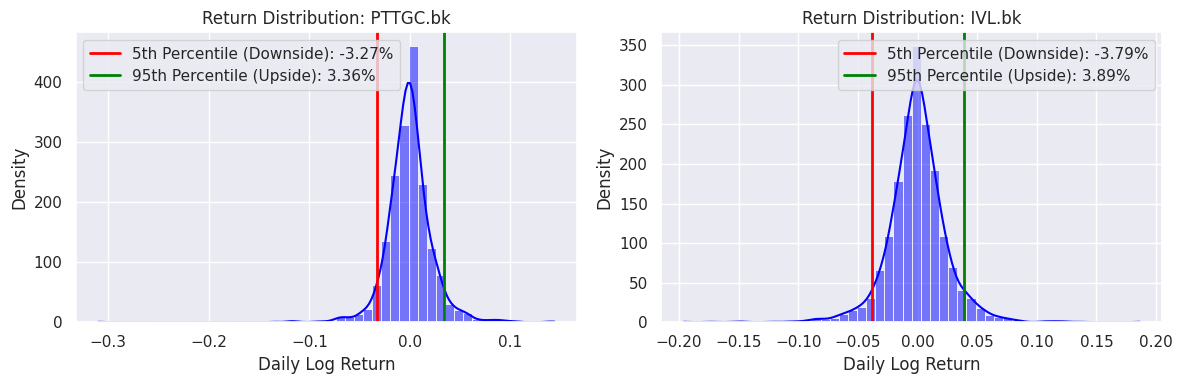

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



cols = 2  # กำหนดจำนวนคอลัมน์ที่ต้องการ
rows = math.ceil(len(symbols) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    sns.histplot(data, bins=50, color='blue', kde=True)

    p5 = np.percentile(data, 5) * 100
    p95 = np.percentile(data, 95) * 100

    plt.axvline(x=p5 / 100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95 / 100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # พิมพ์ผลลัพธ์
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()


image.png

In [187]:
import yfinance as yf
import pandas as pd

symbols = ['SCC.bk','CPN.bk','WHA.bk','LH.bk']


# สร้าง DataFrame เปล่า
stocks = pd.DataFrame()

start_date = '2020-01-01'
end_date = '2024-12-31'

for x in symbols:
    print(f"กำลังดึงข้อมูลของ {x} ...")
    data = yf.download(x, start=start_date, end=end_date, auto_adjust=False)

    if 'Adj Close' in data.columns:
        stocks[x] = data['Adj Close']
    else:
        print(f"⚠️ ไม่พบ 'Adj Close' ในข้อมูลของ {x}")

# ปรับวันที่
stocks.index = stocks.index.strftime('%m/%d/%Y')
stocks.reset_index(inplace=True)
stocks.rename(columns={'index': 'Date'}, inplace=True)

print(stocks.head())

กำลังดึงข้อมูลของ SCC.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ CPN.bk ...
กำลังดึงข้อมูลของ WHA.bk ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


กำลังดึงข้อมูลของ LH.bk ...
         Date      SCC.bk     CPN.bk    WHA.bk     LH.bk
0  01/02/2020  327.930084  54.647224  3.153107  6.938542
1  01/03/2020  322.074188  54.867580  3.120767  7.075939
2  01/06/2020  311.198944  53.986172  3.007579  6.869843
3  01/07/2020  316.218262  53.765816  3.039918  7.007239
4  01/08/2020  305.343048  52.664055  2.829711  6.938542


<Axes: title={'center': ' Real estate Group-SET50Close Prices (2020-2024)'}, xlabel='Date'>

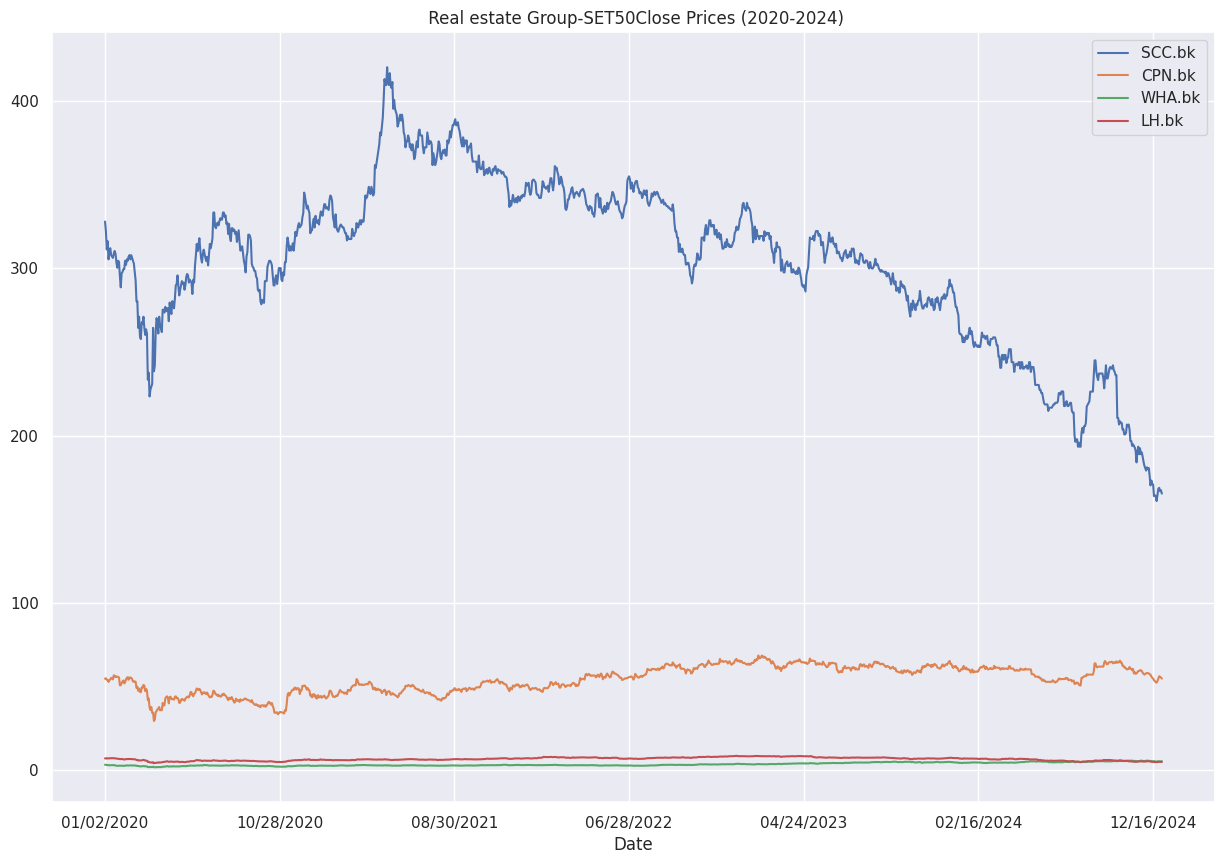

In [188]:
# พล็อตราคาดิบของหุ้นทั้งหมดในช่วงเวลานี้
stocks.set_index('Date', inplace=True)
stocks.plot(figsize=(15,10), title=' Real estate Group-SET50Close Prices (2020-2024)')

<Axes: title={'center': 'Normalized Real estate Group-SET50 (Base 100)'}, xlabel='Date'>

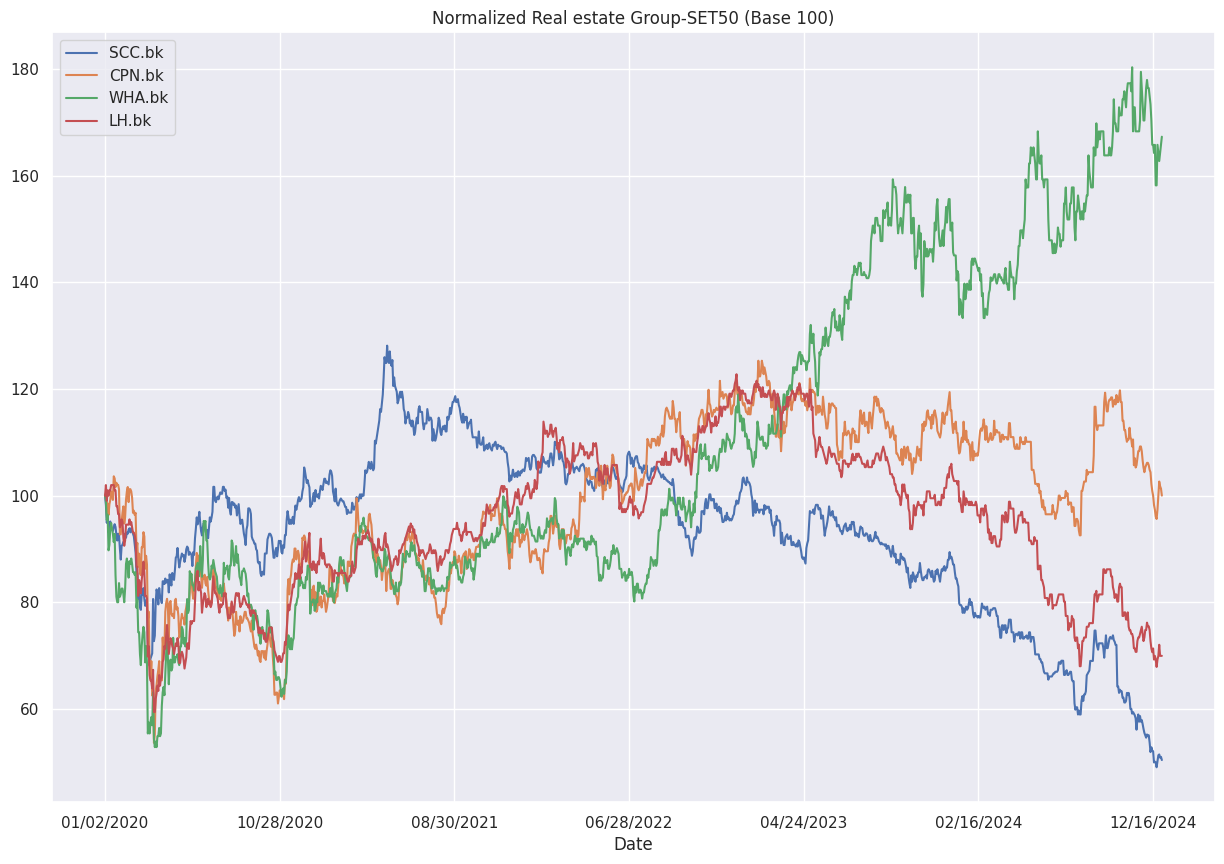

In [189]:
# สมมติว่า stocks เป็น DataFrame ที่มีคอลัมน์เป็นชื่อหุ้นและ index เป็นวันที่
# เช่น stocks.iloc[0] คือราคาหุ้นวันที่แรก

# ทำ normalization
normStocks = stocks / stocks.iloc[0] * 100

# plot เพื่อเปรียบเทียบการเปลี่ยนแปลงราคาในสเกลเดียวกัน
normStocks.plot(figsize=(15,10), title='Normalized Real estate Group-SET50 (Base 100)')

In [ ]:
import numpy as np

# normStocks คือ DataFrame ราคาหุ้นที่ normalized แล้ว (หรือใช้ stocks ก็ได้)

# คำนวณ log return
log_return = np.log(normStocks / normStocks.shift(1))

# ตัดข้อมูลแถวแรกที่เป็น NaN (เพราะไม่มีข้อมูลวันที่ก่อนหน้า)
rets = log_return.dropna()

# แสดงข้อมูลบางส่วน
print(rets.head())

              SCC.bk    CPN.bk    WHA.bk     LH.bk
Date                                              
01/04/2018  0.012171 -0.008811  0.009569 -0.009479
01/05/2018 -0.012171 -0.017858 -0.004773  0.009479
01/08/2018  0.004073 -0.015129  0.000000  0.000000
01/09/2018  0.008097 -0.003053  0.009524  0.009390
01/10/2018  0.016000  0.003053  0.004728 -0.009390


หุ้น SCC.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000452
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.015396
  - หมายความว่า โดยเฉลี่ยหุ้น SCC.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0452% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.5396% ต่อวัน
--------------------------------------------------
หุ้น CPN.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000279
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.019295
  - หมายความว่า โดยเฉลี่ยหุ้น CPN.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0279% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 1.9295% ต่อวัน
--------------------------------------------------
หุ้น WHA.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000022
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.021992
  - หมายความว่า โดยเฉลี่ยหุ้น WHA.bk มีการเปลี่ยนแปลงราคาประมาณ -0.0022% ต่อวัน
  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ 2.1992% ต่อวัน
--------------------------------------------------
หุ้น LH.bk:
  - ค่าเฉลี่ยของ Log Return (μ): -0.000348
  - ส่วนเบี่ยงเบนมาตรฐาน (σ): 0.015031
  - หมายความว่า โดยเฉลี่ยหุ้น LH.bk มีการเ

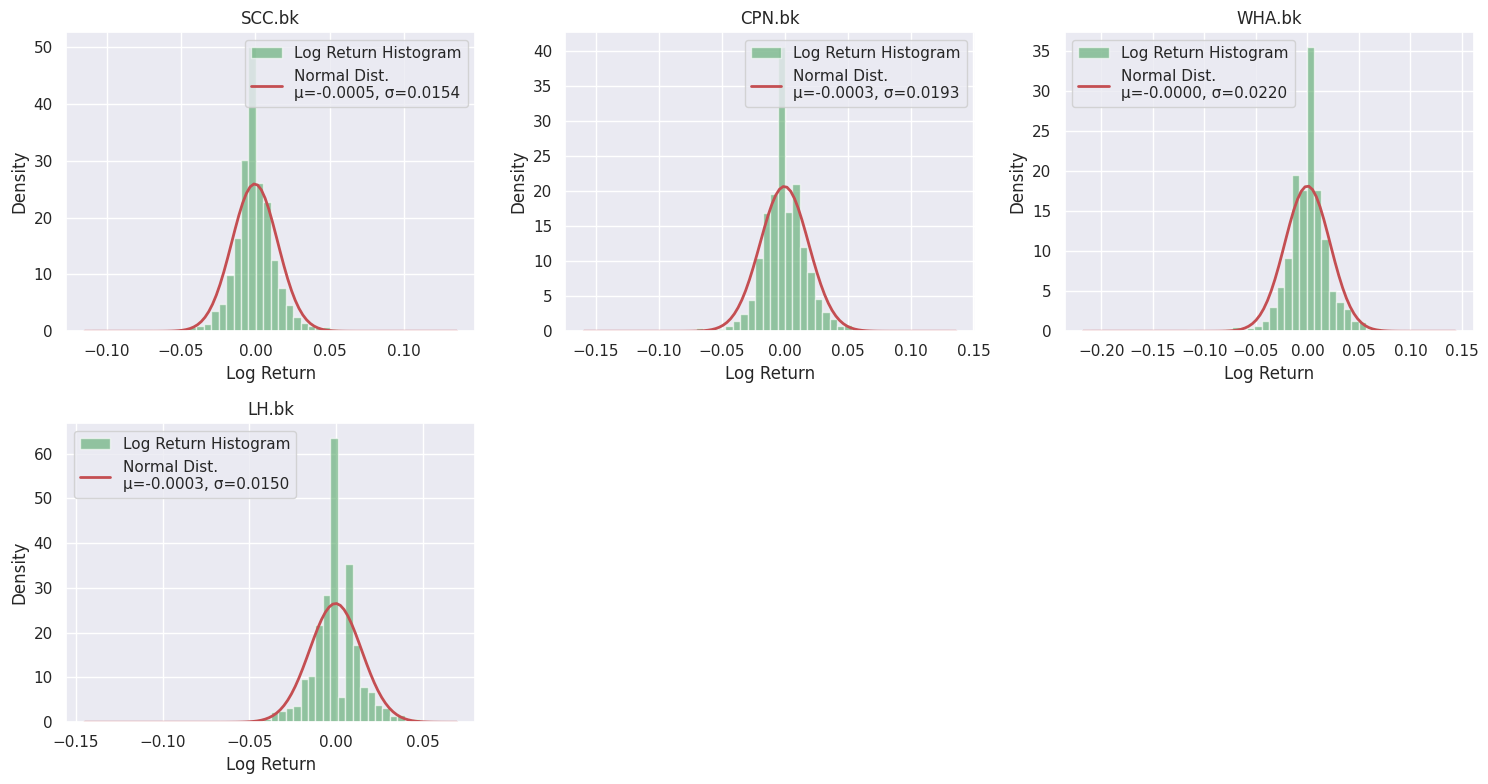

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# สมมติ rets และ symbols พร้อมแล้ว

n = len(symbols)
cols = 3  # เลือกจำนวน column ที่ต้องการ
rows = math.ceil(n / cols)  # คำนวณจำนวนแถวให้พอดี

plt.figure(figsize=(5 * cols, 4 * rows))  # ขยายขนาดให้พอดี

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    # Plot histogram
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Log Return Histogram')

    # Mean & Std
    mu, std = data.mean(), data.std()

    # Normal distribution
    x = np.linspace(data.min(), data.max(), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist.\nμ={mu:.4f}, σ={std:.4f}')

    plt.title(f'{sym}')
    plt.xlabel('Log Return')
    plt.ylabel('Density')
    plt.legend()

    # Console Output
    print(f"หุ้น {sym}:")
    print(f"  - ค่าเฉลี่ยของ Log Return (μ): {mu:.6f}")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐาน (σ): {std:.6f}")
    print(f"  - หมายความว่า โดยเฉลี่ยหุ้น {sym} มีการเปลี่ยนแปลงราคาประมาณ {mu*100:.4f}% ต่อวัน")
    print(f"  - ส่วนเบี่ยงเบนมาตรฐานบ่งชี้ความผันผวนประมาณ {std*100:.4f}% ต่อวัน")
    print('-'*50)

plt.tight_layout()
plt.show()


SCC.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.29% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.21% ต่อวัน (Upside Potential)

CPN.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.67% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.83% ต่อวัน (Upside Potential)

WHA.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.98% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 3.33% ต่อวัน (Upside Potential)

LH.bk:
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า 2.42% ต่อวัน (Downside Risk)
  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า 2.26% ต่อวัน (Upside Potential)



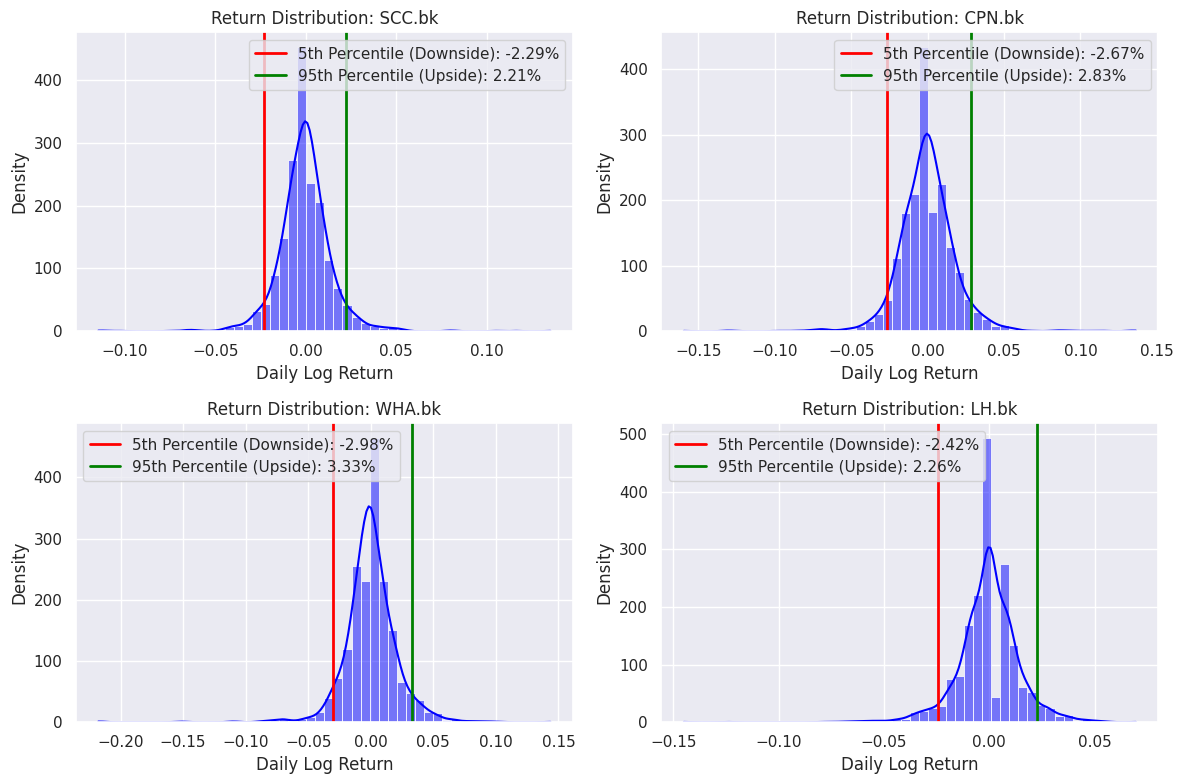

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



cols = 2  # กำหนดจำนวนคอลัมน์ที่ต้องการ
rows = math.ceil(len(symbols) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))

for i, sym in enumerate(symbols, 1):
    plt.subplot(rows, cols, i)

    data = rets[sym]

    sns.histplot(data, bins=50, color='blue', kde=True)

    p5 = np.percentile(data, 5) * 100
    p95 = np.percentile(data, 95) * 100

    plt.axvline(x=p5 / 100, color='red', linewidth=2, label=f'5th Percentile (Downside): {p5:.2f}%')
    plt.axvline(x=p95 / 100, color='green', linewidth=2, label=f'95th Percentile (Upside): {p95:.2f}%')

    plt.title(f'Return Distribution: {sym}')
    plt.xlabel('Daily Log Return')
    plt.ylabel('Density')
    plt.legend()

    # พิมพ์ผลลัพธ์
    print(f"{sym}:")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะลดลงมากกว่า {abs(p5):.2f}% ต่อวัน (Downside Risk)")
    print(f"  - ความมั่นใจ 95%: มีโอกาส 5% ที่หุ้นจะขึ้นมากกว่า {p95:.2f}% ต่อวัน (Upside Potential)")
    print()

plt.tight_layout()
plt.show()
